
# Predicting Health Insurance



### Author:
- **Gonçalo Melo**



# **INTRODUCTION**

**Business Problem**:
This project aims to swiftly develop a predictive model that clearly identifies customers lacking health insurance. Our objective is to analyze customer properties such as age, employment status, income, status of residence and vehicle ownership—by leveraging a dataset of US customers (customer.csv) to estimate the likelihood of having an health insurance. The company will be supported by this predictive model in targeting interventions or marketing efforts toward uninsured customers, thereby improving service offerings and guaranteeing broader insurance coverage.

In the United States, accessing medical services relies on health insurance, which also provides financial protection against medical expenses. However, a significant portion of the population remains uninsured, creating challenges for companies aiming to provide health-related services or products. Identifying uninsured customers from the data can allow businesses/companies to:

* Understand Coverage Gaps: Determine key demographic and socioeconomic factors contributing to lack of insurance.
* Improve Customer Outreach: Focus resources on segments of customers more likely to lack coverage.
* Enhance Service Delivery: Tailor offerings to meet the needs of uninsured populations.
Accurately identifying these customers is important, as failure to do so may result in many ineffective resource allocations, along with important missed opportunities to serve an underserved market.

Our next step is to understand and process the data that we have.

# 1) **Data understanding and Data processing**

### 1.1) **Simple description of the data**

In this section, we provide an initial exploration of the dataset by examining basic descriptive statistics and structural details such as the mean, the median and number of rows and columns.

In [ ]:
import numpy as np
import random
import os
import sys
import matplotlib.pyplot as  plt
import pandas as pd
from pandas import read_table, read_csv
import seaborn as sns

os.chdir("C://Users//Geral//Desktop//projeto ids")
#"C://Users//Geral//Desktop//projeto ids"

df=pd.read_csv("customer.csv")

df.head()


#First we read the file and describe the data:

In [ ]:
df.describe()

,Unnamed: 0,income,num_vehicles,age,code_column,gas_usage,rooms
count,72458.000000,7.245800e+04,70772.000000,72458.000000,72458.000000,70772.000000,72458.000000
mean,49910.637556,4.188143e+04,2.066820,49.208893,3285.523572,41.230501,3.494549
std,28772.082702,5.827460e+04,1.170076,18.090035,2661.775225,63.149323,1.706537
min,7.000000,-6.900000e+03,0.000000,0.000000,131.000000,1.000000,1.000000
25%,24911.250000,1.070000e+04,1.000000,34.000000,1305.000000,3.000000,2.000000
50%,49838.000000,2.640000e+04,2.000000,48.000000,2269.000000,10.000000,3.000000
75%,74786.750000,5.200000e+04,3.000000,62.000000,4979.000000,60.000000,5.000000
max,100000.000000,1.257000e+06,6.000000,120.000000,8962.000000,570.000000,6.000000


### 1.2) **Preprocessing the Data**

In this section, we begin the data preprocessing.

- **First Step**:  
  - We removed the column "Unnamed: 0", as it did not contain any useful information for our analysis  



In [ ]:
# Dropping the unnecessary column
df.drop(columns=["Unnamed: 0"], inplace=True)

df.head()

,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [ ]:
#Checking the feature "is_employed" and treating Nan
print(df["is_employed"].unique())

[True nan False]


### 1.2.1) **Employment Status Feature**
After checking the data dictionary we found out that in the USA there are 3 different types of employment status:

- **Types of Employment Status in the USA**:  
  - People working.  
  - People not working.  
  - People not working and not in the workforce (e.g., students, retirees, or not looking for a job).

- **Solution**:  
  - We divided the **employment status** feature into **2 encoded classes** to simplify the data.


In [ ]:

df = pd.get_dummies(df, columns=['is_employed'], prefix='employment_status', dummy_na=True, drop_first=True)
#get_dummies was used to divide the cases into 2 columns(the 3rd one is dropped because it is redundant)

### 1.2.2) **Null Values in this dataset**
After analysing that there are null values in this dataset we decided to imput the mode on them.

In [ ]:
df.isnull().sum()

custid                       0
sex                          0
income                       0
marital_status               0
health_ins                   0
housing_type              1686
num_vehicles              1686
age                          0
state_of_res                 0
code_column                  0
gas_usage                 1686
rooms                        0
recent_move_b             1687
employment_status_True       0
employment_status_nan        0
dtype: int64

In [ ]:
# We input NA values with mode


df[['num_vehicles','gas_usage','recent_move_b', 'housing_type']].mode()
columns_to_fill = ['num_vehicles', 'gas_usage', 'recent_move_b', 'housing_type']
for col in columns_to_fill:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Geral\AppData\Local\Temp\ipykernel_18924\3694858337.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### 1.2.3) **Checking for duplicated IDs**
We checked for duplicated IDs, and didnt encounter any

In [ ]:
print(df[df["custid"].duplicated()].sum())

custid                      0
sex                         0
income                    0.0
marital_status              0
health_ins                  0
housing_type                0
num_vehicles              0.0
age                         0
state_of_res                0
code_column                 0
gas_usage                 0.0
rooms                       0
recent_move_b               0
employment_status_True      0
employment_status_nan       0
dtype: object


### 1.2.4) **recent_move_b feature**
In this feature, we had an array(['F', 'T']) and we decided to convert it to boolean values(False and True).

In [ ]:
df["recent_move_b"].unique() #There were some typping errors in this feature

#array(['F', 'T'], dtype=object)

df["recent_move_b"] = df["recent_move_b"].replace({"F" : False, "T": True})

#We convert the T and F into Bool values

C:\Users\Geral\AppData\Local\Temp\ipykernel_18924\25418319.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["recent_move_b"] = df["recent_move_b"].replace({"F" : False, "T": True})


### 1.2.5) **Code_column Feature**

- **Analysis**:  
  - The **code_column** seems to represent states.  
  - Each number corresponds to a specific state.

- **Issue**:  
  - There were **1661 cases** where **code_column** corresponds to more than one state.

- **Decision**:  
  - We decided to drop the **state_of_res** column and kept the code_column one.  
  - It was deemed redundant and could add noise to the dataset.


In [ ]:

state_code_check = df.groupby('code_column')['state_of_res'].nunique()
print(state_code_check[state_code_check > 1])
#We decided to see if there are codes that correspond to a different state and we saw that happening twice
print(df[df['code_column'].isin([170, 671])][['code_column', 'state_of_res']].drop_duplicates())

#Identify the values of code_column that correspond to more than a state
multi_state_codes = state_code_check[state_code_check > 1].index

# Filter the dataframe to count how many rows have these code_column values
num_cases = df[df['code_column'].isin(multi_state_codes)].shape[0]

print(f"There are {num_cases} cases where 'code_column' corresponds to more than a state")


code_column
170    2
671    2
Name: state_of_res, dtype: int64
       code_column          state_of_res
14522          170  District of Columbia
36904          671           Mississippi
39569          671                Nevada
49677          170          North Dakota
There are 1661 cases where 'code_column' corresponds to more than a state


In [ ]:
df = df.drop(columns=["state_of_res"])


### 1.2.6) **Categorical Variables**

- **Encoding Method**:  
  - We used **pandas get_dummies** to encode categorical variables.  
  - We chose this method over **label encoding** since the variables are **nominal** (no inherent order) and have no ordinal relationship.

- **Categorical Variables in this Dataset**:  
  - **Sex**  
  - **Marital Status**  
  - **Housing Type**  

- **Note**:  
  - Instead of removing the **state_of_res** column in the previous section, we could have kept it and applied **one-hot encoding** to it.


In [ ]:
df = pd.get_dummies(df, columns=["sex", "marital_status", "housing_type"], drop_first=True)

In [ ]:
df.head()

,custid,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms,recent_move_b,employment_status_True,employment_status_nan,sex_Male,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented
0,000006646_03,22000.0,True,0.0,24,1047,210.0,3,False,True,False,True,False,True,False,False,False,False
1,000007827_01,23200.0,True,0.0,82,1047,3.0,6,True,False,True,False,False,False,False,False,False,True
2,000008359_04,21000.0,True,2.0,31,1047,40.0,3,False,True,False,False,False,True,False,True,False,False
3,000008529_01,37770.0,True,1.0,93,1047,120.0,2,False,False,True,False,False,False,True,False,False,False
4,000008744_02,39000.0,True,2.0,67,1047,3.0,2,False,True,False,True,False,False,False,False,False,True


### 1.2.7) **Checking/Converting data types**
In this section we checked data types and decided to convert boolean values into integer values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   custid                                     72458 non-null  object 
 1   income                                     72458 non-null  float64
 2   health_ins                                 72458 non-null  bool   
 3   num_vehicles                               72458 non-null  float64
 4   age                                        72458 non-null  int64  
 5   code_column                                72458 non-null  int64  
 6   gas_usage                                  72458 non-null  float64
 7   rooms                                      72458 non-null  int64  
 8   recent_move_b                              72458 non-null  bool   
 9   employment_status_True                     72458 non-null  bool   
 10  employment_status_nan 

In [ ]:
# Convert all bool values into int(0 and 1)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   custid                                     72458 non-null  object 
 1   income                                     72458 non-null  float64
 2   health_ins                                 72458 non-null  int32  
 3   num_vehicles                               72458 non-null  float64
 4   age                                        72458 non-null  int64  
 5   code_column                                72458 non-null  int64  
 6   gas_usage                                  72458 non-null  float64
 7   rooms                                      72458 non-null  int64  
 8   recent_move_b                              72458 non-null  int32  
 9   employment_status_True                     72458 non-null  int32  
 10  employment_status_nan 

### 1.2.8) **Gas_usage Feature**

The **gas_usage** column represents the customer's monthly gas bill, with the following encoded values:

- **1**: Included in rent/condo fees.  
- **2**: Included in electricity payment.  
- **3**: No charge or gas not used.  
- **4-999**: Represents gas bills in dollars (between 4 and 999).

We applied the following transformations to this column:

- **Binary Features**:  
  - Created new columns:  
    - **included_in_rent**  
    - **included_in_electricity**  
    - **no_charge**  
  - These columns identify the specific conditions described above.

- **gas_bill_amount**:  
  - A new column to store valid gas bill amounts (4-999 dollars).  
  - For special cases (1, 2, 3), the value is set to **0**.



In [ ]:
# We create binary columns for each special condition of gas_usage

df['included_in_rent'] = df['gas_usage'].apply(lambda x: 1 if x == 1.0 else 0)
df['included_in_electricity'] = df['gas_usage'].apply(lambda x: 1 if x == 2.0 else 0)
df['no_charge'] = df['gas_usage'].apply(lambda x: 1 if x == 3.0 else 0)

# In case the row is one of the 3 columns above the gas_bill_amount will be 0 $
df['gas_bill_amount'] = df['gas_usage'].apply(lambda x: int(x) if 4 <= x <= 999 else 0)


# dataset with this code applied
display(df)
df.describe()

,custid,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms,recent_move_b,employment_status_True,employment_status_nan,sex_Male,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented,included_in_rent,included_in_electricity,no_charge,gas_bill_amount
0,000006646_03,22000.0,1,0.0,24,1047,210.0,3,0,1,0,1,0,1,0,0,0,0,0,0,0,210
1,000007827_01,23200.0,1,0.0,82,1047,3.0,6,1,0,1,0,0,0,0,0,0,1,0,0,1,0
2,000008359_04,21000.0,1,2.0,31,1047,40.0,3,0,1,0,0,0,1,0,1,0,0,0,0,0,40
3,000008529_01,37770.0,1,1.0,93,1047,120.0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,120
4,000008744_02,39000.0,1,2.0,67,1047,3.0,2,0,1,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72453,001506841_02,18500.0,0,1.0,25,131,10.0,4,0,1,0,0,0,1,0,0,0,1,0,0,0,10
72454,001507219_01,20800.0,1,1.0,86,131,120.0,6,0,0,1,0,0,0,1,0,0,0,0,0,0,120
72455,001513103_01,75000.0,1,2.0,50,131,90.0,3,0,1,0,1,1,0,0,1,0,0,0,0,0,90
72456,001519624_01,22200.0,0,1.0,61,131,50.0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,50


,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms,recent_move_b,employment_status_True,employment_status_nan,sex_Male,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented,included_in_rent,included_in_electricity,no_charge,gas_bill_amount
count,7.245800e+04,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000
mean,4.188143e+04,0.904703,2.065265,49.208893,3285.523572,40.340929,3.494549,0.124182,0.615943,0.352135,0.482997,0.524994,0.263877,0.065224,0.452372,0.015457,0.303017,0.032681,0.090176,0.364004,39.035883
std,5.827460e+04,0.293626,1.156427,18.090035,2661.775225,62.675849,1.706537,0.329792,0.486375,0.477639,0.499714,0.499378,0.440736,0.246922,0.497730,0.123363,0.459566,0.177802,0.286436,0.481153,63.467979
min,-6.900000e+03,0.000000,0.000000,0.000000,131.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070000e+04,1.000000,1.000000,34.000000,1305.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.640000e+04,1.000000,2.000000,48.000000,2269.000000,10.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,5.200000e+04,1.000000,3.000000,62.000000,4979.000000,50.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,50.000000
max,1.257000e+06,1.000000,6.000000,120.000000,8962.000000,570.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,570.000000


### 1.2.9) **EDA(data distribution)**
In this section, we explore how the data is distributed.

- **Skewed Data**:  
  - **Income** and **gas_bill_amount** show skewed distributions.  
  - This may be acceptable for some models.  
  - Other models may require normalization or standardization.

- **Outliers**:  
  - **Age** and **income** features contain outliers.  
  - These will be addressed later for distance-based models (e.g., **KNN**, **SVM**).

- **Important Note**:  
  - Handling outliers differently across models can affect comparability.  
  - For instance, removing outliers for **KNN** but not for **Random Forests** means we can't directly compare their performance.


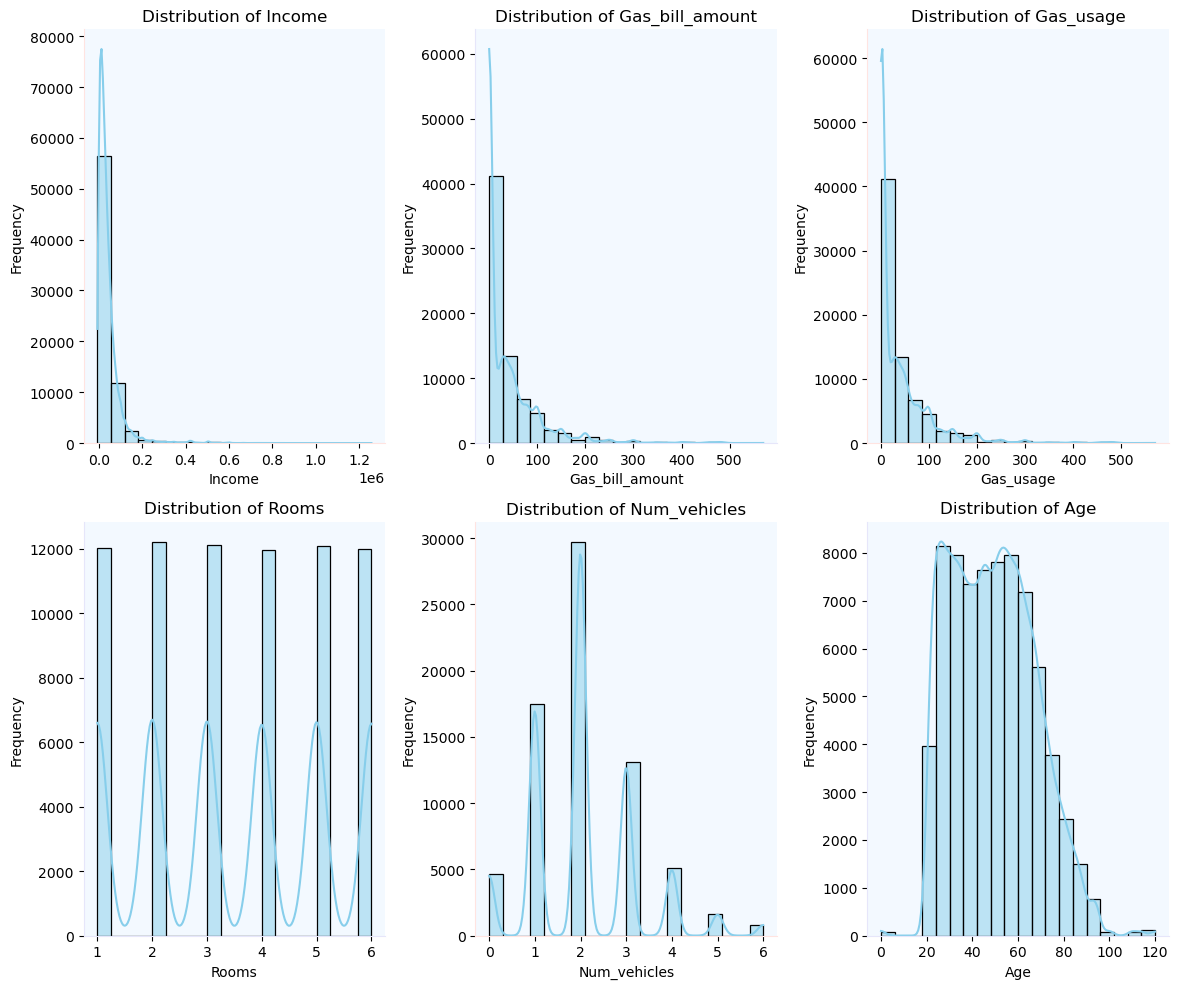

In [ ]:
columns = ['income','gas_bill_amount','gas_usage','rooms','num_vehicles', 'age']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 10))  # 2x3 grid for 6 columns

# Flatten the axes for easier iteration
axes = axes.flatten()
column_colors = ['#FFE4E1', '#E6E6FA']
# Loop through each subplot to set individual aesthetics
for i, ax in enumerate(axes.flatten()):
    col_color = column_colors[i % 2]  # Alternate column colors
    ax.set_facecolor('#F0F8FF')      # Light blue for plot background
    ax.patch.set_alpha(0.8)         # Slight transparency for plot background
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(col_color)
    ax.spines['bottom'].set_color(col_color)

# Plot each column
for i, column in enumerate(columns):
    sns.histplot(df[column], kde=True, ax=axes[i], bins=20, color='skyblue')
    axes[i].set_title(f"Distribution of {column.capitalize()}")
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel("Frequency")


# Adjust layout
plt.tight_layout()
#plt.savefig("EDA plot.png", format="png")
plt.show()


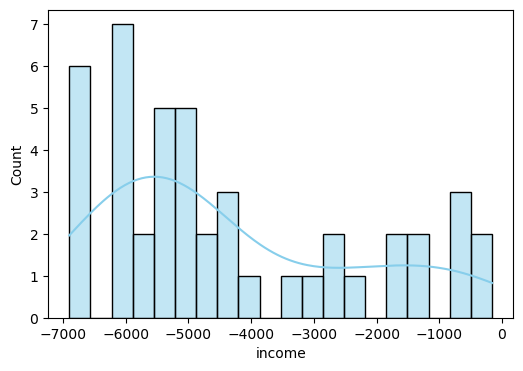

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df[df['income'] < 0]['income'], kde=True, bins=20, color='skyblue')
#plt.savefig("income_plot.png", format="png")
plt.show()

### 1.2.10) **EDA(income)**
Data on income has negative values so we need to be aware of that when performing a logaritmization.
Our approach for this situation was to keep the negative/positive sign and then we applied log to the absolute value of income.

After doing this we can see clearly that the negative and positive income are now normally distributed.


In [ ]:
df['transformed_income'] = np.sign(df['income']) * np.log1p(abs(df['income']))
df.describe()

,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms,recent_move_b,employment_status_True,employment_status_nan,sex_Male,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented,included_in_rent,included_in_electricity,no_charge,gas_bill_amount,transformed_income
count,7.245800e+04,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000
mean,4.188143e+04,0.904703,2.065265,49.208893,3285.523572,40.340929,3.494549,0.124182,0.615943,0.352135,0.482997,0.524994,0.263877,0.065224,0.452372,0.015457,0.303017,0.032681,0.090176,0.364004,39.035883,9.249029
std,5.827460e+04,0.293626,1.156427,18.090035,2661.775225,62.675849,1.706537,0.329792,0.486375,0.477639,0.499714,0.499378,0.440736,0.246922,0.497730,0.123363,0.459566,0.177802,0.286436,0.481153,63.467979,3.180575
min,-6.900000e+03,0.000000,0.000000,0.000000,131.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.839422
25%,1.070000e+04,1.000000,1.000000,34.000000,1305.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.278092
50%,2.640000e+04,1.000000,2.000000,48.000000,2269.000000,10.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.181157
75%,5.200000e+04,1.000000,3.000000,62.000000,4979.000000,50.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,50.000000,10.859018
max,1.257000e+06,1.000000,6.000000,120.000000,8962.000000,570.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,570.000000,14.044239


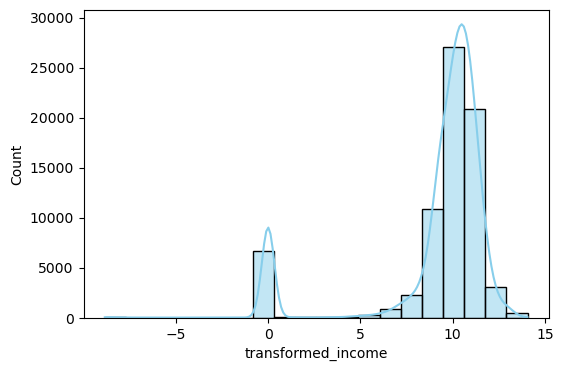

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df["transformed_income"], kde=True, bins=20, color='skyblue')
#plt.savefig("Transf_income_plot.png", format="png")
plt.show()

In [ ]:
df['transformed_gas_bill_amount'] =np.log1p(df['gas_bill_amount'])
df['transformed_gas_usage'] =np.log1p(df['gas_usage'])
df.describe()

,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms,recent_move_b,employment_status_True,employment_status_nan,sex_Male,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented,included_in_rent,included_in_electricity,no_charge,gas_bill_amount,transformed_income,transformed_gas_bill_amount,transformed_gas_usage
count,7.245800e+04,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000
mean,4.188143e+04,0.904703,2.065265,49.208893,3285.523572,40.340929,3.494549,0.124182,0.615943,0.352135,0.482997,0.524994,0.263877,0.065224,0.452372,0.015457,0.303017,0.032681,0.090176,0.364004,39.035883,9.249029,2.063653,2.689991
std,5.827460e+04,0.293626,1.156427,18.090035,2661.775225,62.675849,1.706537,0.329792,0.486375,0.477639,0.499714,0.499378,0.440736,0.246922,0.497730,0.123363,0.459566,0.177802,0.286436,0.481153,63.467979,3.180575,2.092297,1.491434
min,-6.900000e+03,0.000000,0.000000,0.000000,131.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.839422,0.000000,0.693147
25%,1.070000e+04,1.000000,1.000000,34.000000,1305.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.278092,0.000000,1.386294
50%,2.640000e+04,1.000000,2.000000,48.000000,2269.000000,10.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.181157,2.397895,2.397895
75%,5.200000e+04,1.000000,3.000000,62.000000,4979.000000,50.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,50.000000,10.859018,3.931826,3.931826
max,1.257000e+06,1.000000,6.000000,120.000000,8962.000000,570.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,570.000000,14.044239,6.347389,6.347389


### 1.2.11) **More logaritimizations**
For gas_bill_amount and gas_usage we have also applied logaritimizations. In the below plots we can see how the data changed its distribution after applying these transformations.

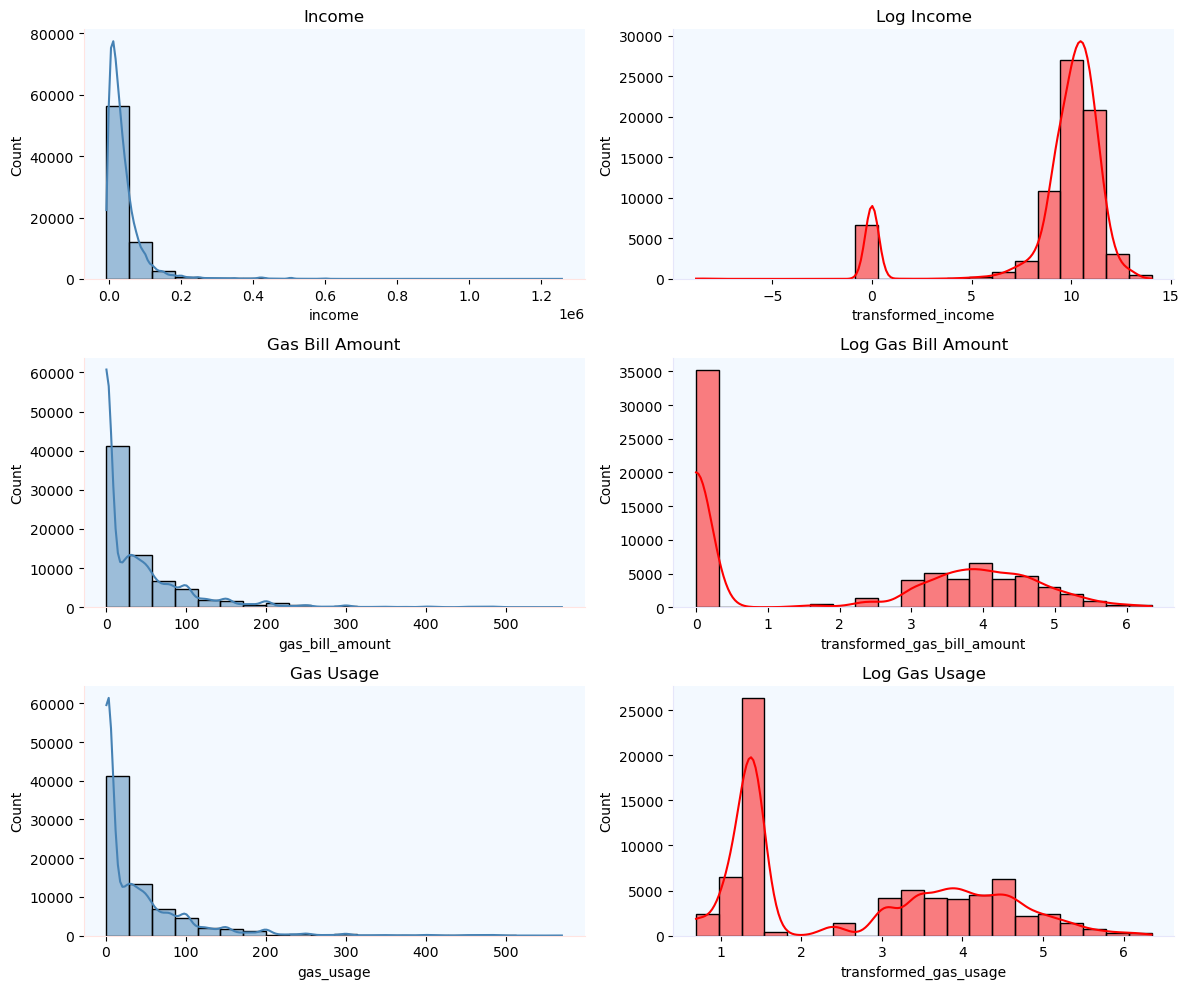

In [ ]:

# We create a 3x2 grid of plots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Loop through each subplot to set individual aesthetics
for i, ax in enumerate(axes.flatten()):
    col_color = column_colors[i % 2]  # Alternate column colors
    ax.set_facecolor('#F0F8FF')      # Light blue for plot background
    ax.patch.set_alpha(0.8)         # Slight transparency for plot background
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(col_color)
    ax.spines['bottom'].set_color(col_color)

# Plot each histogram with a consistent color for bars
sns.histplot(df["income"], kde=True, bins=20, color='#4682B4', ax=axes[0, 0])
axes[0, 0].set_title("Income")

sns.histplot(df["transformed_income"], kde=True, bins=20, color='red', ax=axes[0, 1])
axes[0, 1].set_title("Log Income")

sns.histplot(df["gas_bill_amount"], kde=True, bins=20, color='#4682B4', ax=axes[1, 0])
axes[1, 0].set_title("Gas Bill Amount")

sns.histplot(df["transformed_gas_bill_amount"], kde=True, bins=20, color='red', ax=axes[1, 1])
axes[1, 1].set_title("Log Gas Bill Amount")

sns.histplot(df["gas_usage"], kde=True, bins=20, color='#4682B4', ax=axes[2, 0])
axes[2, 0].set_title("Gas Usage")

sns.histplot(df["transformed_gas_usage"], kde=True, bins=20, color='red', ax=axes[2, 1])
axes[2, 1].set_title("Log Gas Usage")

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig("LOG_PLOTS.png", format="png")
plt.show()


### 1.2.12) **Age feature**
For the age feature we applied a code removing values lower than 20 years and higher than 100 years.

In [ ]:
# We assume 0 values to be 20 and values greater than 100 to be 100
df['age'] = df['age'].clip(lower=20, upper=100)

In [ ]:
df.describe()

,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms,recent_move_b,employment_status_True,employment_status_nan,sex_Male,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented,included_in_rent,included_in_electricity,no_charge,gas_bill_amount,transformed_income,transformed_gas_bill_amount,transformed_gas_usage
count,7.245800e+04,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000,72458.000000
mean,4.188143e+04,0.904703,2.065265,49.191366,3285.523572,40.340929,3.494549,0.124182,0.615943,0.352135,0.482997,0.524994,0.263877,0.065224,0.452372,0.015457,0.303017,0.032681,0.090176,0.364004,39.035883,9.249029,2.063653,2.689991
std,5.827460e+04,0.293626,1.156427,17.917211,2661.775225,62.675849,1.706537,0.329792,0.486375,0.477639,0.499714,0.499378,0.440736,0.246922,0.497730,0.123363,0.459566,0.177802,0.286436,0.481153,63.467979,3.180575,2.092297,1.491434
min,-6.900000e+03,0.000000,0.000000,20.000000,131.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.839422,0.000000,0.693147
25%,1.070000e+04,1.000000,1.000000,34.000000,1305.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.278092,0.000000,1.386294
50%,2.640000e+04,1.000000,2.000000,48.000000,2269.000000,10.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.181157,2.397895,2.397895
75%,5.200000e+04,1.000000,3.000000,62.000000,4979.000000,50.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,50.000000,10.859018,3.931826,3.931826
max,1.257000e+06,1.000000,6.000000,100.000000,8962.000000,570.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,570.000000,14.044239,6.347389,6.347389


### 1.2.13) **Features Correlation with Each Other - Interesting Observations**

After analyzing the correlation matrix, several interesting relationships between features were observed:

- **Age ↔ Num_Vehicles**:  
  - Moderate positive correlation (~0.46).  
  - Older customers tend to own more vehicles.  
  - May indicate greater financial stability or larger family size.

- **Income ↔ Employment_Status_True**:  
  - Strong positive correlation (~0.61).  
  - Employment is closely linked to higher income levels.  
  - Highlights the impact of employment status on financial well-being.

- **Marital_Status_Married ↔ Age**:  
  - Moderate positive correlation (~0.49).  
  - Older individuals are more likely to be married.  
  - Reflects common life stages.

- **Employment_Status_True ↔ Age**:  
  - Moderate positive correlation (~0.45).  
  - As age increases, individuals are more likely to be employed.  
  - May indicate job stability or availability with age.

- **Marital_Status_Married ↔ Included_in_Rent**:  
  - Moderate negative correlation (~ -0.25).  
  - Married individuals are less likely to have gas expenses included in rent.  
  - Could be due to homeownership or different living arrangements.


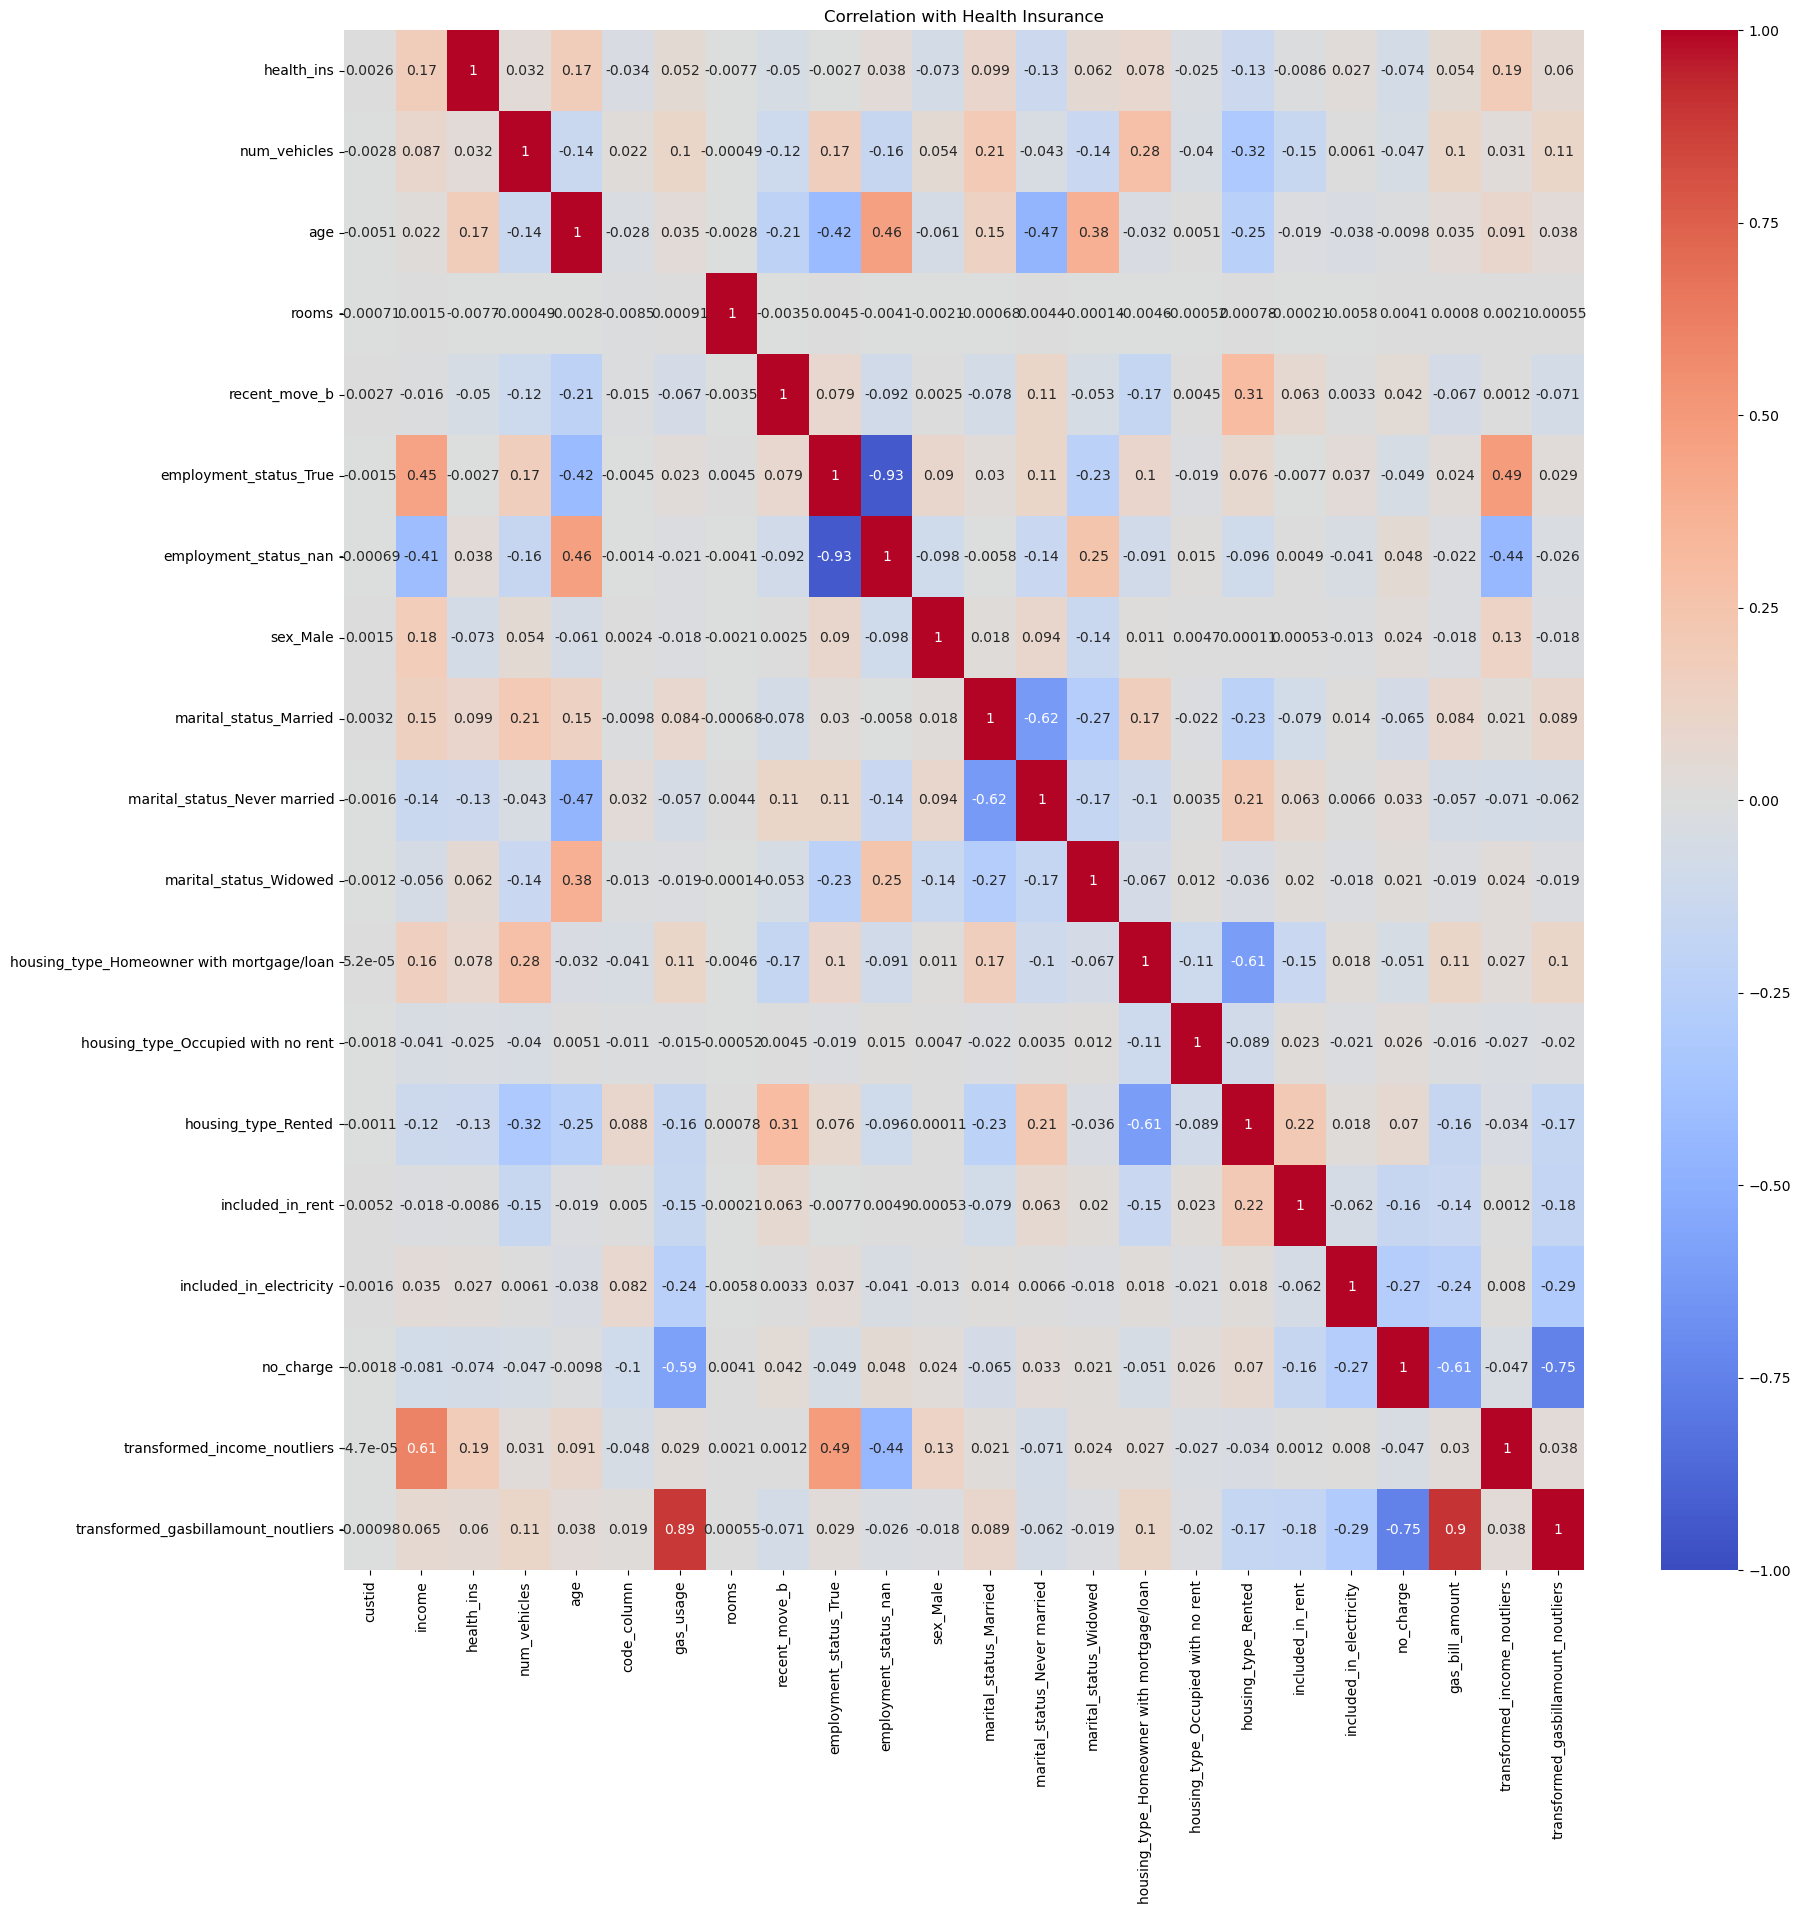

In [ ]:
columns_to_exclude = ['income', 'gas_bill_amount', 'gas_usage','custid','code_column']
filtered_correlation = correlation_matrix.drop(index=columns_to_exclude)
plt.figure(figsize=(20, 20))
sns.heatmap(filtered_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Health Insurance')
plt.show()

### 1.2.14) **Preprocessing for customer_test_masked.csv**
This file has suffered the same preprocessing as customer.csv and was saved as Processing_final.csv in the cell below.

In [ ]:
####################################################################

# Salvar arquivo de processing
#df.to_csv('Processing_FINAL.csv', index=True, header=True)

####################################################################

# 2) **Modelling**
For the modeling phase, we will take two approaches regarding the treatment of outliers and feature scaling:

*   The first is for models that are more robust and less sensitive to outliers (e.g. `Random Forests, XGboost, Decision Trees, Neural Networks`): These models are less affected by outliers and do not require feature scaling. For this group, we will use the preprocessing done so far.
*  The second one will be training models with the same dataset but with a optimized preprocessing(removing outliers and standardizing the data). This can be useful for example for distance-based models (e.g., `KNN, SVM`): These models are sensitive to the scale of data and outliers. Therefore, we will preprocess the dataset by removing outliers and applying standardization to ensure optimal performance. We will also analyse if we can get a better performance in a tree ensemble model by using this preprocessing pipeline.

It is important to note once again that using different preprocessing techniques for these models means we cannot directly compare their performance. For example, results from a `KNN` model trained on a standardized dataset without outliers cannot be directly compared to a `Random Forests` model trained on the original dataset. Each model’s performance must be evaluated within the context of its preprocessing pipeline.


## 2.1) **Robust Models(Random Forests, Neural Networks, XGBoost, Decision Tree)**
In this section we will work with these more robust models, training them with a dataset that still has the outliers and didn't suffer any scaling method.
Firstly, we defined the input features (`X`) and the target variable (`y`). The target column `health_ins` is separated from the features, and the `custid` column is dropped as it is not needed for the model.

We then apply `SMOTE` **(Synthetic Minority Over-sampling Technique)** to address class imbalance. SMOTE generates synthetic samples for the minority class to balance the distribution of the target variable.

`Note`: Previously, we tested RF, KNN, SVM, LR and Gradient boosting without balancing classes.
However, since we always got worse results than when we applied `SMOTE` we will only highlight our best results. In these ones `SMOTE` was always used.
We also tested `undersampling` techniques and experimented with various types of `class_weight` parameters in the models, but they did not yield better results.

In [ ]:
# Define the inputs and target

X = df.drop(columns=["health_ins", "custid"])  # Drop the target column to keep features
y = df["health_ins"]

In [ ]:
from imblearn.over_sampling import SMOTE

# Aplicar o SMOTE
smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
from collections import Counter
print(f"Original Distribution: {Counter(y)}")
print(f"Pos-SMOTE Distribution: {Counter(y_resampled)}")

Original Distribution: Counter({1: 65553, 0: 6905})
Pos-SMOTE Distribution: Counter({1: 65553, 0: 65553})


## **Robust Models Performance**

In this section, before we present the code with some detail, we will already present the results of **robust models**, highlighting their best performance metrics such as **Accuracy**, **Precision**, **Recall**, **F1-score**, and **AUC** on the training set, along with their **F1-score/Kaggle score** on the test set. The table below summarizes the results: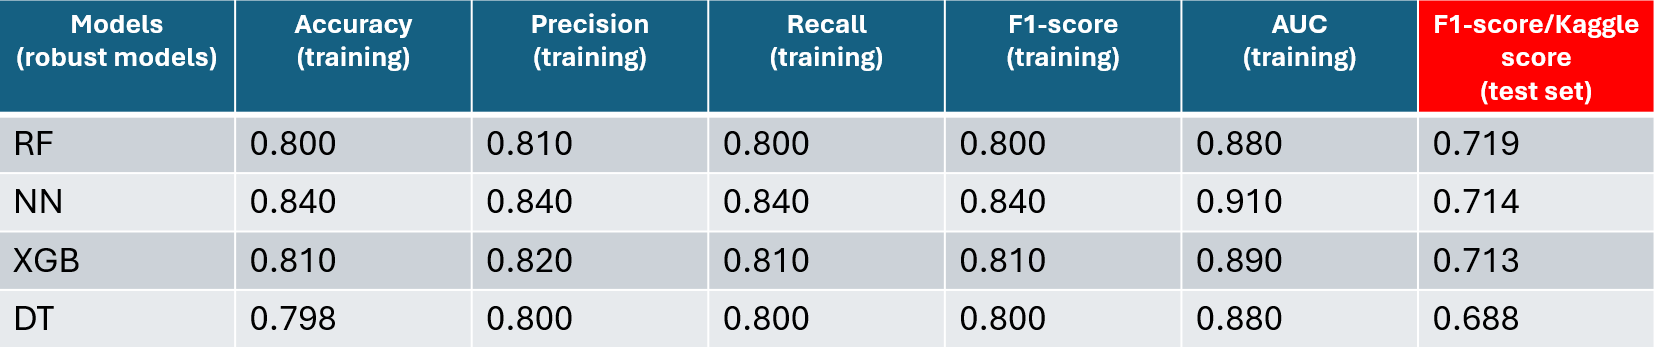
RF - Random Forests | NN - Neural Networks | XGB - XGBoost | DT - Decision Tree
### Key Notes:
- The training process that led to these results will be thoroughly explained in the sections below.
- A separate section in the next sections of the report will present results for **models using optimized preprocessing** with a similar table format(standardization and remove of outliers will be done in some sections below).
- **Conclusions** about the performance of both robust models and models with optimized preprocessing will be discussed in the last part of the report **3) Conclusion**.

## 2.1.1) **Random Forests**
Random Forests is a powerful ensemble learning method that combines multiple decision trees to improve classification or regression performance. By averaging the predictions of individual trees, it reduces overfitting and enhances model accuracy. One key advantage of Random Forests is its ability to measure feature importance, providing insights into which variables contribute most to the model's predictions.

In the code below, we will train a Random Forest model using all features, evaluate their importance, and select the most significant ones. Additionally, we will also introduce an interaction between age and income.

Feature Importance Ranking:
age: 0.2417
income: 0.1840
transformed_income: 0.1823
housing_type_Rented: 0.0464
code_column: 0.0361
employment_status_nan: 0.0333
sex_Male: 0.0326
marital_status_Married: 0.0321
housing_type_Homeowner with mortgage/loan: 0.0297
marital_status_Never married: 0.0291
num_vehicles: 0.0204
employment_status_True: 0.0202
gas_usage: 0.0166
transformed_gas_usage: 0.0165
rooms: 0.0152
gas_bill_amount: 0.0135
transformed_gas_bill_amount: 0.0133
no_charge: 0.0127
marital_status_Widowed: 0.0119
recent_move_b: 0.0047
included_in_electricity: 0.0037
housing_type_Occupied with no rent: 0.0027
included_in_rent: 0.0012
                                      Feature  Importance
2                                         age    0.241692
0                                      income    0.184014
20                         transformed_income    0.182271
15                        housing_type_Rented    0.046415
3                                 code_column    0.036119
8           

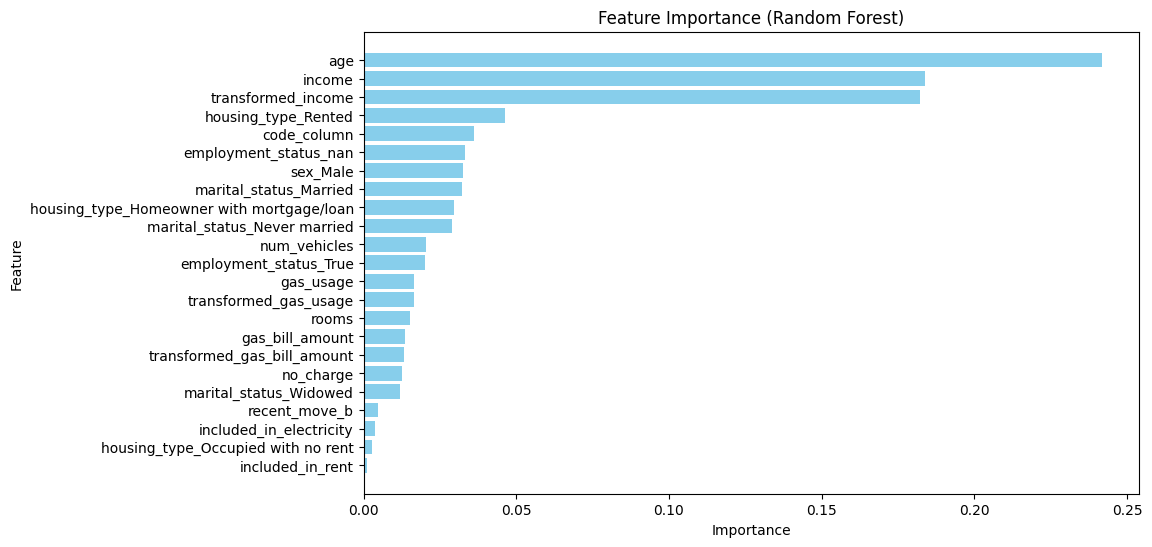

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the random forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Sort features by importance
feature_ranking = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

# Display ranked features
print("Feature Importance Ranking:")
for feature, importance in feature_ranking:
    print(f"{feature}: {importance:.4f}")


# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # We invert the axis for better readability
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()


In [ ]:
Columns = ["age", "income", "housing_type_Rented", "code_column", "employment_status_nan", "marital_status_Married", "housing_type_Homeowner with mortgage/loan"]
#select the variables with most importance and create an interaction
X_resampled_select = X_resampled[Columns]

X_resampled_select["age*income"] = X_resampled_select["age"] * X_resampled_select["income"]


C:\Users\1\AppData\Local\Temp\ipykernel_22092\2444673697.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_resampled_select["age*income"] = X_resampled_select["age"] * X_resampled_select["income"]


### 2.1.1.1) **Random Forest - Evaluation Metrics**
The Random Forest model achieved an **Accuracy** of 84%, with **F1-scores** of 84% for Class 0 and 83% for Class 1. The average **ROC-AUC score** was 0.917, indicating good performance in distinguishing between classes.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Split data (if needed for further evaluation)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_select, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

# Use cross-validation on training data
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')  # Using ROC-AUC as the scoring metric
print(f"Cross-validation ROC-AUC scores: {cv_scores}")
print(f"Mean cross-validation ROC-AUC score: {cv_scores.mean()}")

# Train the model on the entire training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model performance on the test set
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs))

Cross-validation ROC-AUC scores: [0.91442771 0.91384806 0.91605877 0.91689825 0.91381505]
Mean cross-validation ROC-AUC score: 0.9150095667054519
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84     12994
           1       0.86      0.81      0.83     13228

    accuracy                           0.84     26222
   macro avg       0.84      0.84      0.84     26222
weighted avg       0.84      0.84      0.84     26222

Confusion Matrix:
 [[11310  1684]
 [ 2543 10685]]
ROC-AUC Score: 0.9170477032524932


### 2.1.1.2) **Random Forest - Learning curve**
Now lets visualize how is the model learning. The learning curve provides valuable insights into how well the Random Forest model learns as the training size increases. It compares the training performance with cross-validation performance, allowing us to detect issues such as overfitting or underfitting. In this case we can see that this curve can be improved. For that, we will check the feature importance once again and choose other features to train the model and see how it goes.

c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^

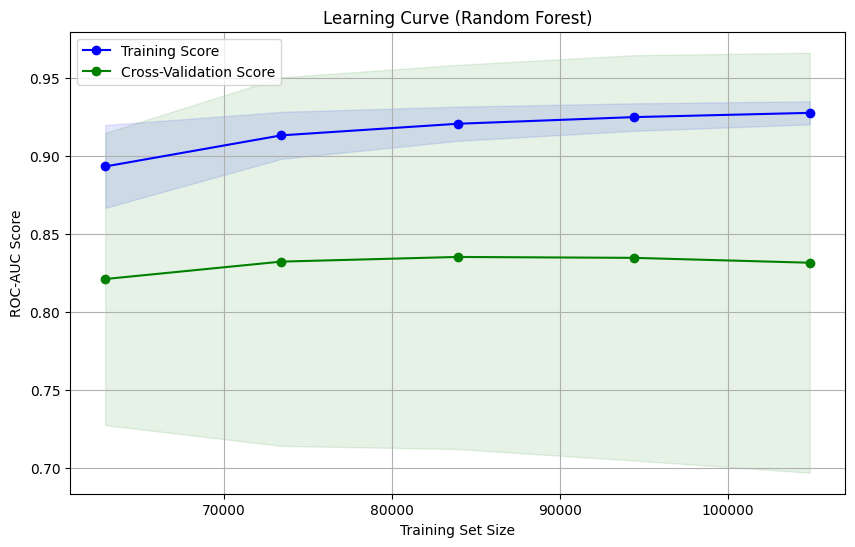

In [ ]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=rf_model,
    X=X_resampled_select,  # Full feature set
    y=y_resampled,  # Target variable
    train_sizes=np.linspace(0.1, 1.0, 10),  # Fractions of the training data to use
    cv=5,  # Number of cross-validation splits
    scoring='roc_auc',  # Metric to evaluate (ROC-AUC in this case)
    random_state=42
)

# Compute mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_mean, 'o-', color='green', label='Cross-Validation Score')

# Fill in the area for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.1)

# Add labels and legend
plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Set Size')
plt.ylabel('ROC-AUC Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

The curve indicates that the model is overfitting, so we need to understand the reasons behind it.

To gain insights into how the model is learning, we plotted a feature importance graph.

                                     Feature  Importance
0                                        age    0.207344
5                     marital_status_Married    0.181900
7                                 age*income    0.163417
6  housing_type_Homeowner with mortgage/loan    0.159258
1                                     income    0.138521
4                      employment_status_nan    0.061362
2                        housing_type_Rented    0.053859
3                                code_column    0.034338


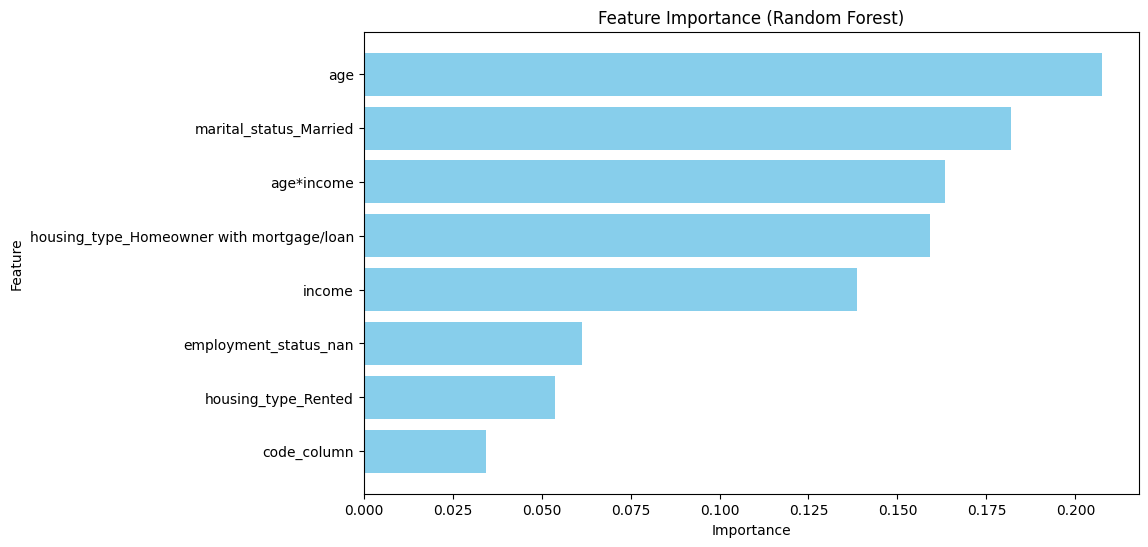

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert axis for better readability
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()

We can drop some of the columns and then train the model again!

In [ ]:
Columns = ["age", "income", "marital_status_Married", "housing_type_Homeowner with mortgage/loan"]

X_resampled_select = X_resampled[Columns]

X_resampled_select["age*income"] = X_resampled_select["age"] * X_resampled_select["income"]

C:\Users\Geral\AppData\Local\Temp\ipykernel_18924\3866335546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_resampled_select["age*income"] = X_resampled_select["age"] * X_resampled_select["income"]


In [ ]:
X_resampled_select.head()

,age,income,marital_status_Married,housing_type_Homeowner with mortgage/loan,age*income
0,24,22000.0,0,0,528000.0
1,82,23200.0,0,0,1902400.0
2,31,21000.0,0,1,651000.0
3,93,37770.0,0,0,3512610.0
4,67,39000.0,0,0,2613000.0


In [ ]:
# Split data (if needed for further evaluation)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_select, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

# Cross-validation: ROC-AUC and Accuracy
roc_auc_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')  # Using ROC-AUC as the scoring metric
accuracy_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')  # Using Accuracy as the scoring metric

print(f"Cross-validation ROC-AUC scores: {roc_auc_cv_scores}")
print(f"Mean cross-validation ROC-AUC score: {roc_auc_cv_scores.mean()}")

print(f"Cross-validation Accuracy scores: {accuracy_cv_scores}")
print(f"Mean cross-validation Accuracy score: {accuracy_cv_scores.mean()}")

# Train the model on the entire training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model performance on the test set
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Test ROC-AUC Score:", roc_auc_score(y_test, y_probs))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred))


Cross-validation ROC-AUC scores: [0.87622614 0.87818545 0.87848244 0.88293251 0.87763498]
Mean cross-validation ROC-AUC score: 0.8786923032381846
Cross-validation Accuracy scores: [0.79877962 0.80307003 0.80354674 0.81022072 0.80253623]
Mean cross-validation Accuracy score: 0.8036306672663572
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81     12994
           1       0.84      0.74      0.79     13228

    accuracy                           0.80     26222
   macro avg       0.80      0.80      0.80     26222
weighted avg       0.81      0.80      0.80     26222

Confusion Matrix:
 [[11189  1805]
 [ 3432  9796]]
Test ROC-AUC Score: 0.8800562606434762
Test Accuracy Score: 0.800282205781405


### 2.1.1.2) **Random Forest - Learning curve**
After implementing the adjustments, the learning curve demonstrates improved performance. The training score remains high, while the cross-validation score shows consistent alignment, indicating better generalization

c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^

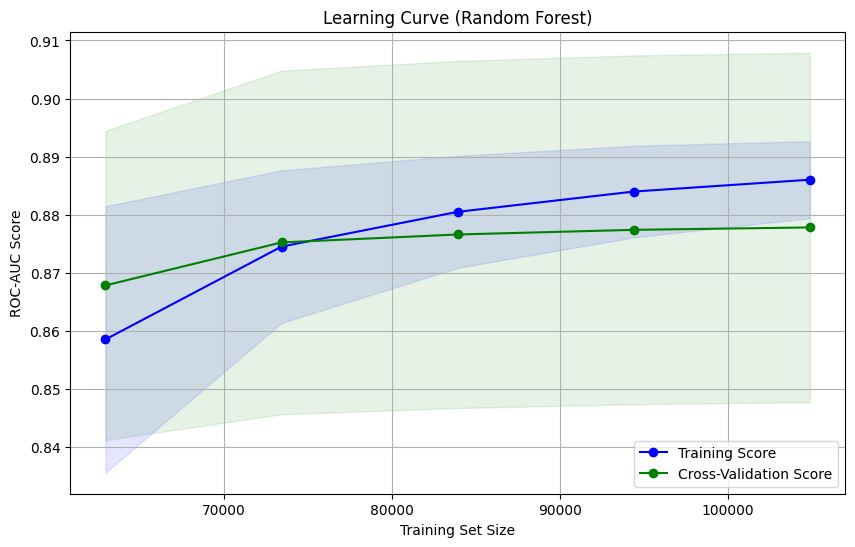

In [ ]:
# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=rf_model,
    X=X_resampled_select,  # Full feature set
    y=y_resampled,  # Target variable
    train_sizes=np.linspace(0.1, 1.0, 10),  # Fractions of the training data to use
    cv=5,  # Number of cross-validation splits
    scoring='roc_auc',  # Metric to evaluate (ROC-AUC in this case)
    random_state=42
)

# Compute mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_mean, 'o-', color='green', label='Cross-Validation Score')

# Fill in the area for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.1)

# Add labels and legend
plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Set Size')
plt.ylabel('ROC-AUC Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### 2.1.1.3) **Random Forests - ROC Curve and AUC**

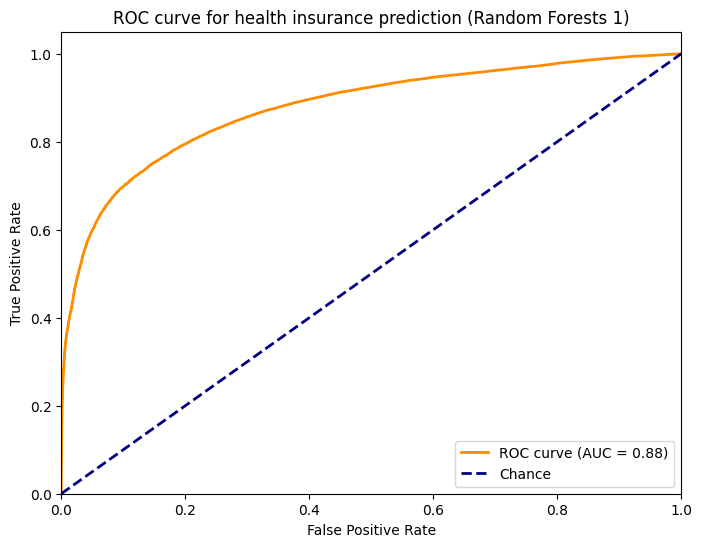

AUC = 0.88


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

#Calculating AUC and ROC curve
y_scores = cross_val_predict(rf_model, X_resampled_select, y_resampled, cv=5, method='predict_proba')[:, 1]

fpr, tpr, thresholds = roc_curve(y_resampled, y_scores)
roc_auc = roc_auc_score(y_resampled, y_scores)

#ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for health insurance prediction (Random Forests 1)')
plt.legend(loc="lower right")
plt.show()

#AUC for the test set
print(f"AUC = {roc_auc:.2f}")

The ROC curve shows that the model is performing way better than the random guess!

### 2.1.1.4) **Random Forests - How did we create the submission file?**
The code below outlines the process of generating predictions for the test dataset using a Random Forest model. It starts by loading the pre-processed test data and creating a new feature based on the interaction between age and income(in case it exists). A subset of relevant columns is then selected for prediction. The Random Forest model (rf_model) is used to predict health insurance status, and the results are converted to a binary output of "TRUE" or "FALSE". Finally, a submission file is created and saved in CSV format, containing customer IDs and their corresponding predictions.

In [ ]:
#################################################################
#################################################################

# Read the processed .csv
df_test_masked_pp = pd.read_csv('Processing_FINAL.csv')


# Creating interactions columns that did not exist
df_test_masked_pp["age*income"] = df_test_masked_pp["age"] * df_test_masked_pp["income"]

Columns = ["age", "income", "employment_status_nan", "marital_status_Married", "housing_type_Homeowner with mortgage/loan", "age*income"]


# Select the selected columns that we use to train the model
X_test_masked = df_test_masked_pp[Columns]

In [ ]:
y_test_masked_predictions = rf_model.predict(X_test_masked)


y_test_masked_predictions = np.where(y_test_masked_predictions == 1, 'TRUE', 'FALSE')


submission = pd.DataFrame({
   'custid': df_test_masked_pp['custid'],
    'health_ins': y_test_masked_predictions
})

# Save the submission file
submission.to_csv('submissionRF5_new_FINAL.csv', index=False, header=True)

#########################################################################################################
#########################################################################################################

### 2.1.1.5) **Random Forests - Kaggle Score**
We submit this Random Forest model on kaggle obtaining a **f1-score on the test set** of 0.719!

#### 2.1.1.6) **Random Forests - Randomized Search**
We also did a Random Search for obtaining better parameters but it result on a very complex model resulting in Overfitting
There's the code we use:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'max_features': ['sqrt', 'log2', 0.2, 0.5, None],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'bootstrap': [True, False]
    }

# Initialize Random Forest
rf_2 = RandomForestClassifier(random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_2, param_distributions=param_dist, n_iter=50, cv=5, scoring='f1', random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_resampled_select, y_resampled)

# Best parameters found
print("Best Parameters:", random_search.best_params_)

# Best model accuracy
print("Best Model Accuracy:", random_search.best_score_)

c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30, 'class_weight': 'balanced_subsample', 'bootstrap': True}
Best Model Accuracy: 0.8032358681199547


In [ ]:
# Split data (if needed for further evaluation)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_select, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=1000,
    max_depth=30,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features= None,
    class_weight='balanced_subsample',
    bootstrap= True,
    random_state=42
)

# Use cross-validation on training data
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')  # Using ROC-AUC as the scoring metric
print(f"Cross-validation ROC-AUC scores: {cv_scores}")
print(f"Mean cross-validation ROC-AUC score: {cv_scores.mean()}")

# Train the model on the entire training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model performance on the test set
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs))

Cross-validation ROC-AUC scores: [0.87488505 0.87916542 0.88193422 0.88497983 0.87951317]
Mean cross-validation ROC-AUC score: 0.8800955377192625
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82     12994
           1       0.84      0.76      0.80     13228

    accuracy                           0.81     26222
   macro avg       0.81      0.81      0.81     26222
weighted avg       0.81      0.81      0.81     26222

Confusion Matrix:
 [[11129  1865]
 [ 3146 10082]]
ROC-AUC Score: 0.8815122983187932


c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^

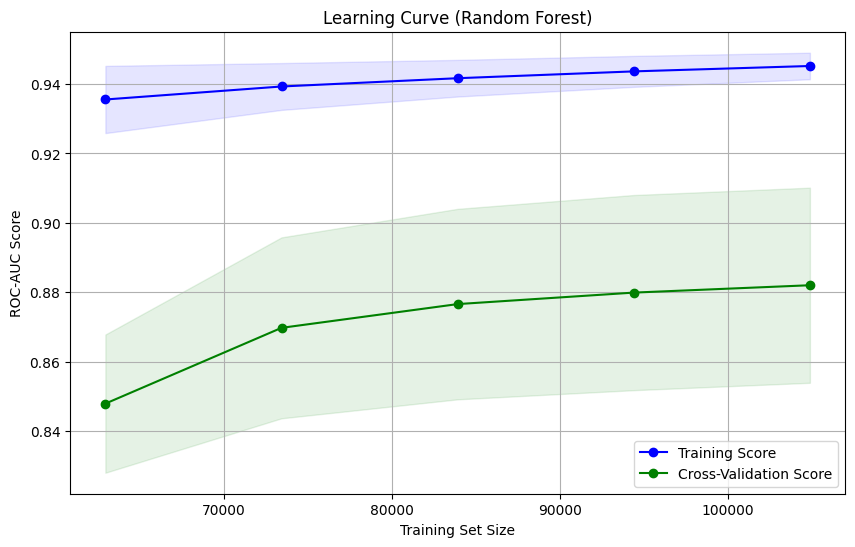

In [ ]:
# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=rf_model,
    X=X_resampled_select,  # Full feature set
    y=y_resampled,  # Target variable
    train_sizes=np.linspace(0.1, 1.0, 10),  # Fractions of the training data to use
    cv=5,  # Number of cross-validation splits
    scoring='roc_auc',  # Metric to evaluate (ROC-AUC in this case)
    random_state=42
)

# Compute mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_mean, 'o-', color='green', label='Cross-Validation Score')

# Fill in the area for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.1)

# Add labels and legend
plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Set Size')
plt.ylabel('ROC-AUC Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

The plot above shows that the model is overfitting!

## 2.1.2) **Neural Networks**

For this model, we will start with default parameters and see how are the evaluation metrics.

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.00      0.00      1394
           1       0.90      1.00      0.95     13098

    accuracy                           0.90     14492
   macro avg       0.58      0.50      0.48     14492
weighted avg       0.84      0.90      0.86     14492

Confusion Matrix:
[[    1  1393]
 [    3 13095]]


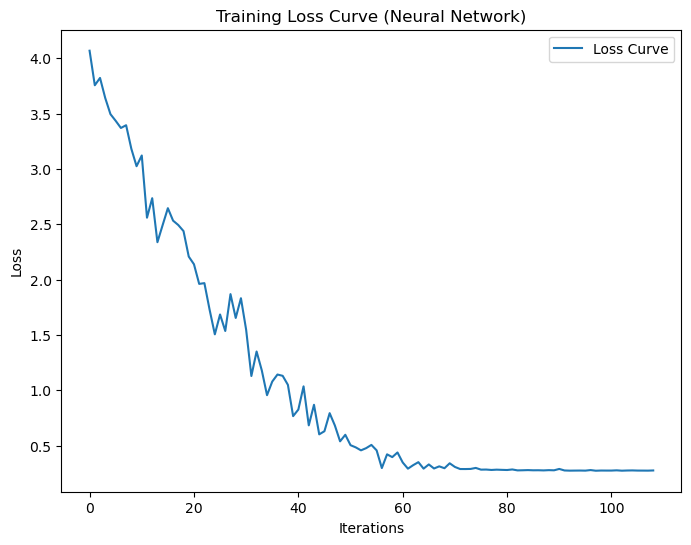

In [ ]:
from sklearn.neural_network import MLPClassifier
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the neural network
nn_model = MLPClassifier(
    hidden_layer_sizes=(50, 50),   # Two hidden layers with 50 neurons each
    activation='relu',            # Activation function for hidden layers
    solver='adam',                # Solver for weight optimization
    learning_rate_init=0.001,     # Initial learning rate
    max_iter=1000,                 # Maximum number of iterations
    random_state=42               # For reproducibility
)
nn_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = nn_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# No feature importance visualization (Neural Networks are not inherently interpretable)
# However, feature importance or contribution can be estimated using techniques like permutation importance or SHAP.

# Optional: Visualize loss curve
plt.figure(figsize=(8, 6))
plt.plot(nn_model.loss_curve_, label='Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve (Neural Network)')
plt.legend()
plt.show()

In the figure above we can see that, in the neural network, above 75/80 iterations the model converges to a global optimum for this model, once the loss doesn't get lower.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_select, y_resampled, test_size=0.2, random_state=42)
# Initialize the Neural Network model
nn_model = MLPClassifier(
    hidden_layer_sizes=(50,50),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42
)

# Use cross-validation on training data
cv_scores = cross_val_score(nn_model, X_train, y_train, cv=5, scoring='roc_auc')  # Using ROC-AUC as the scoring metric
print(f"Cross-validation ROC-AUC scores: {cv_scores}")
print(f"Mean cross-validation ROC-AUC score: {cv_scores.mean()}")

# Train the model on the entire training set
nn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nn_model.predict(X_test)
y_probs = nn_model.predict_proba(X_test)[:, 1]

# Evaluate the model performance on the test set
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs))

Cross-validation ROC-AUC scores: [0.59118154 0.59229788 0.58866397 0.59417186 0.58648636]
Mean cross-validation ROC-AUC score: 0.5905603208050281
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.22      0.35     12994
           1       0.55      0.95      0.70     13228

    accuracy                           0.59     26222
   macro avg       0.69      0.59      0.53     26222
weighted avg       0.68      0.59      0.53     26222

Confusion Matrix:
 [[ 2890 10104]
 [  651 12577]]
ROC-AUC Score: 0.5945747639614459


### 2.1.2.1) **Neural Networks - evaluation metrics**
**The ROC-AUC-Score isn't the best one. For this reason we have to choose other variables and parameters to see if we can improve the model. The variables with most strong and weak correlation with health insurance will be the ones used for our new MLP Classifier Model**. **After choosing other variables and hyperparameters (hyperparameters were chosen through trial and error) our ROC-AUC Score was improved(from 0.59 to 0.92**)

In [ ]:
selected_variables = ['age', 'transformed_income', 'housing_type_Homeowner with mortgage/loan',
                          'marital_status_Married', 'marital_status_Widowed',
                          'housing_type_Rented','employment_status_nan', 'marital_status_Never married', 'recent_move_b', 'sex_Male','no_charge']
X_resampled_select = X_resampled[selected_variables]

In [ ]:
X_resampled_select.head()

,age,transformed_income,housing_type_Homeowner with mortgage/loan,marital_status_Married,marital_status_Widowed,housing_type_Rented,employment_status_nan,marital_status_Never married,recent_move_b,sex_Male,no_charge
0,24,9.998843,0,0,0,0,0,1,0,1,0
1,82,10.051951,0,0,0,1,1,0,1,0,1
2,31,9.952325,1,0,0,0,0,1,0,0,0
3,93,10.539297,0,0,1,0,1,0,0,0,0
4,67,10.571343,0,0,0,1,0,0,0,1,1


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score


# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled_select, y_resampled, test_size=0.2, random_state=42)

# Initialize the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(13, 13), max_iter=1000, random_state=42)

# Cross-validation: ROC-AUC and Accuracy
roc_auc_cv_scores = cross_val_score(nn_model, X_train, y_train, cv=5, scoring='roc_auc')  # Using ROC-AUC as the scoring metric
accuracy_cv_scores = cross_val_score(nn_model, X_train, y_train, cv=5, scoring='accuracy')  # Using Accuracy as the scoring metric

print(f"Cross-validation ROC-AUC scores: {roc_auc_cv_scores}")
print(f"Mean cross-validation ROC-AUC score: {roc_auc_cv_scores.mean()}")

print(f"Cross-validation Accuracy scores: {accuracy_cv_scores}")
print(f"Mean cross-validation Accuracy score: {accuracy_cv_scores.mean()}")

# Train the model on the entire training set
nn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nn_model.predict(X_test)
y_probs = nn_model.predict_proba(X_test)[:, 1]

# Evaluate the model performance on the test set
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Test ROC-AUC Score:", roc_auc_score(y_test, y_probs))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred))


Cross-validation ROC-AUC scores: [0.92161148 0.9205496  0.92102454 0.9219343  0.92132822]
Mean cross-validation ROC-AUC score: 0.9212896274525258
Cross-validation Accuracy scores: [0.84073032 0.83710731 0.83939553 0.83834676 0.84091342]
Mean cross-validation Accuracy score: 0.8392986691464449
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     12994
           1       0.85      0.83      0.84     13228

    accuracy                           0.84     26222
   macro avg       0.84      0.84      0.84     26222
weighted avg       0.84      0.84      0.84     26222

Confusion Matrix:
 [[11067  1927]
 [ 2253 10975]]
Test ROC-AUC Score: 0.9209944464377711
Test Accuracy Score: 0.8405918694226222


### 2.1.2.2) **Neural Networks - learning curve problem**
**The learning curve highlights initial instability in training and validation scores due to insufficient data, indicated by inconsistent scores at smaller training sizes. However, as training size increases, both scores stabilize and converge, reflecting improved generalization. Despite the initial instability, we decided to retain the model as it demonstrates robust performance on larger datasets**

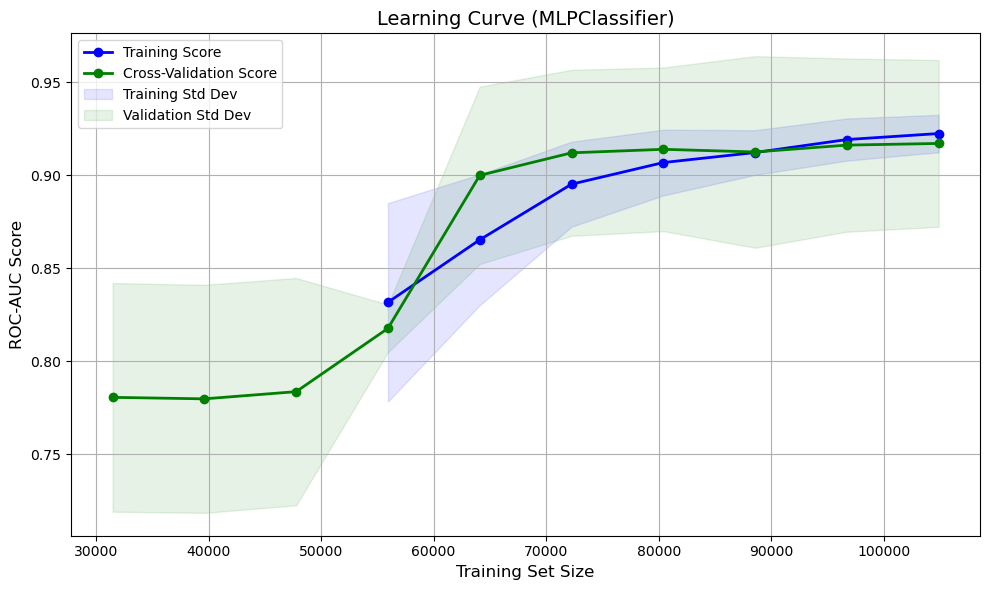

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np


train_sizes = np.linspace(0.3, 1.0, 10)


train_sizes, train_scores, validation_scores = learning_curve(
    estimator=nn_model,
    X=X_resampled_select,
    y=y_resampled,
    train_sizes=train_sizes,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score', linewidth=2)
plt.plot(train_sizes, validation_mean, 'o-', color='green', label='Cross-Validation Score', linewidth=2)


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1, label='Training Std Dev')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.1, label='Validation Std Dev')


plt.title('Learning Curve (MLPClassifier)', fontsize=14)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('ROC-AUC Score', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True)


plt.tight_layout()
plt.show()

In [ ]:
print("Train Sizes:", train_sizes)
print("Train Scores:\n", train_scores)
print("Validation Scores:\n", validation_scores)

Train Sizes: [ 20976  30299  39622  48945  58268  67591  76914  86237  95560 104884]
Train Scores:
 [[       nan 0.81355378 0.79190444 0.79190444 0.79190444]
 [       nan 0.80709158 0.79745489 0.79680401 0.79680401]
 [       nan 0.80559157 0.80705625 0.80307    0.80307   ]
 [       nan 0.81382208 0.80315345 0.80491885 0.80607223]
 [0.93737332 0.80669594 0.79646825 0.80441399 0.80538358]
 [0.94002002 0.86066896 0.86868444 0.87086504 0.86880491]
 [0.94136757 0.89356279 0.89408603 0.89370635 0.89452825]
 [0.94156683 0.9057202  0.90545495 0.90580431 0.90575819]
 [0.94260583 0.91141499 0.91268107 0.91320922 0.91314147]
 [0.94258938 0.9182696  0.9175129  0.91809699 0.91619759]]
Validation Scores:
 [[0.65767749 0.80489381 0.8152663  0.80192688 0.79132084]
 [0.6599059  0.78892328 0.83101563 0.81245477 0.80410034]
 [0.66248021 0.78771828 0.84136492 0.8069623  0.80088378]
 [0.66381609 0.81603935 0.83353111 0.82390016 0.82143923]
 [0.80786699 0.80800823 0.82684999 0.82871933 0.82109444]
 [0.81999

### 2.1.2.3) **Neural Networks - ROC Curve + Kaggle Submission**
**The AUC for this model was 0.91 and this model was able to have a 0.71399 score on Kaggle**

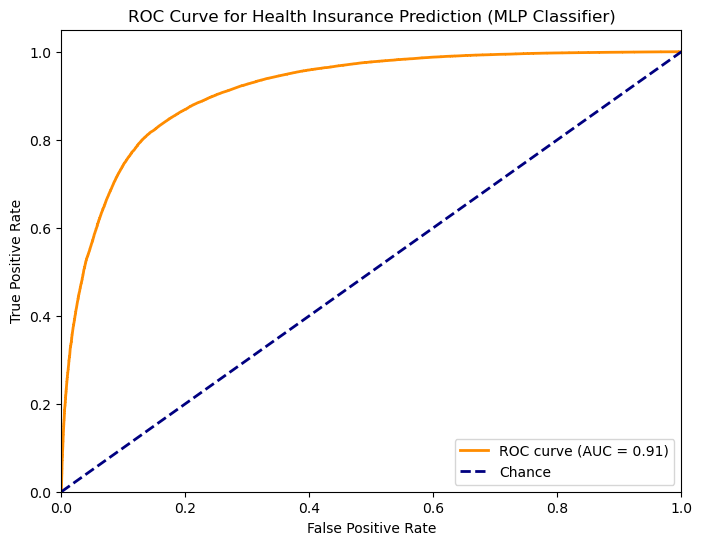

AUC = 0.91


In [ ]:
# Calculating AUC and ROC curve for the MLPClassifier
y_scores = cross_val_predict(
    nn_model,  # Neural network model
    X_resampled_select,  # Features
    y_resampled,  # Target variable
    cv=5,  # Number of cross-validation splits
    method='predict_proba'  # Use probabilities for scoring
)[:, 1]  # Select probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_resampled, y_scores)
roc_auc = roc_auc_score(y_resampled, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Health Insurance Prediction (MLP Classifier)')
plt.legend(loc="lower right")
plt.show()

# Print AUC for the test set
print(f"AUC = {roc_auc:.2f}")

In [ ]:
#################################################################
# Carregar o dataset pré-processado
df_test_masked_pp = pd.read_csv('Processing_FINAL.csv')
X_test_masked = df_test_masked_pp[selected_variables]

In [ ]:
X_test_masked.head()

,age,transformed_income,housing_type_Homeowner with mortgage/loan,marital_status_Married,marital_status_Widowed,housing_type_Rented,employment_status_nan,marital_status_Never married,recent_move_b,sex_Male,no_charge
0,82,10.271631,0,1,0,0,1,0,0,1,0
1,40,10.596660,0,0,0,1,0,1,1,1,0
2,54,12.220966,1,1,0,0,0,0,0,0,0
3,64,0.000000,0,1,0,0,1,0,0,0,0
4,35,10.596660,1,1,0,0,0,0,0,1,0


In [ ]:
y_test_masked_predictions = nn_model.predict(X_test_masked)


y_test_masked_predictions = np.where(y_test_masked_predictions == 1, 'TRUE', 'FALSE')


submission = pd.DataFrame({
   'custid': df_test_masked_pp['custid'],
    'health_ins': y_test_masked_predictions
})


submission.to_csv('submissionmlp.csv', index=False, header=True)

#########################################################################################################
#########################################################################################################

## 2.1.3) **XGBoost model and its differences with other ensemble tree models**

In this section we will train this model using the same logic as the RF model. For this reason, we will only highlight the best results of the same and new methods, which we might have done differently. However, before showing the best results with this model, it is important to highlight its main differences with RF, since both are `ensemble learning models`. Their main difference lies in the way they build trees. `XGBoost` builds trees sequentially, optimising each one based on the errors of the previous one `(boosting)`, while RF builds trees independently in parallel and averages their predictions `(bagging)`, focusing more on reducing variance.

Feature Importance DataFrame:
                                     Feature  Importance
6  housing_type_Homeowner with mortgage/loan    0.454263
3                        housing_type_Rented    0.135807
5                      employment_status_nan    0.110581
7             employment_status_nan*sex_Male    0.085012
0                                        age    0.078084
1                                     income    0.070753
4                                code_column    0.044749
2                                   sex_Male    0.020751


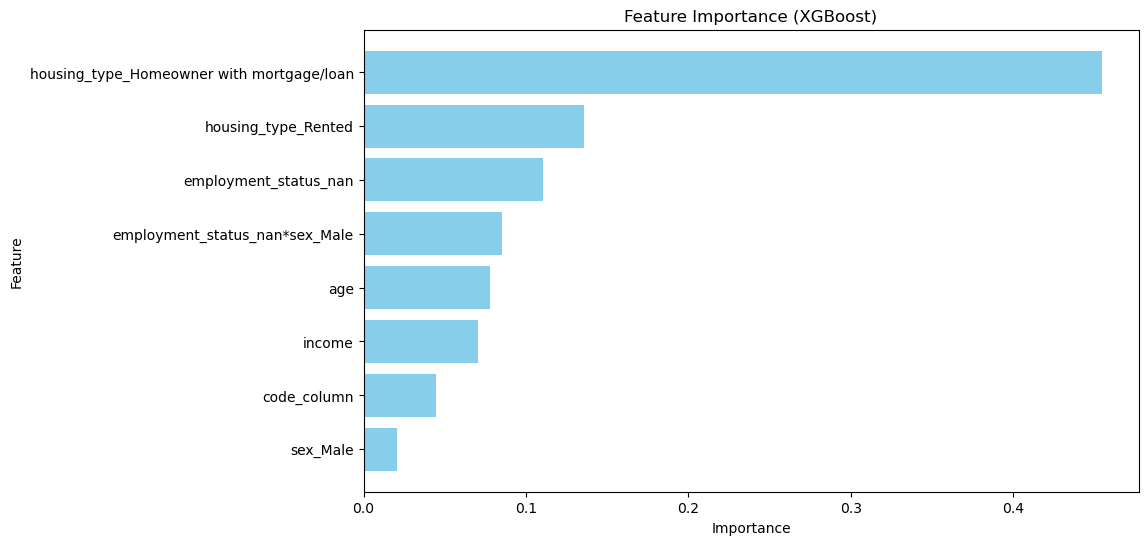

In [ ]:
# Get feature importances
importances = xgb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance DataFrame:")
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert axis for better readability
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (XGBoost)')
plt.show()

In [ ]:
Columns = ["age", "income", "housing_type_Rented", "employment_status_nan","housing_type_Homeowner with mortgage/loan"]

X_resampled_select = X_resampled[Columns]

### 2.1.3.1) **XGBoost - randomized search**
We did a `randomized search` for this model to see if we could find better hyperparameters for it.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

# Define a more focused parameter distribution for RandomizedSearch
param_dist = {
    'n_estimators': randint(100, 500),         
    'max_depth': randint(3, 10),             
    'learning_rate': uniform(0.01, 0.2),       
    'subsample': uniform(0.7, 0.3),           
    'colsample_bytree': uniform(0.7, 0.3),     
    'gamma': uniform(0, 5),                   
    'reg_alpha': uniform(0, 1),                
    'reg_lambda': uniform(1, 10),             
}

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    random_state=42,                     # Ensure reproducibility
    use_label_encoder=False,             
    eval_metric='logloss'                # Metric to evaluate during training
)

# Set up RandomizedSearchCV with a more exhaustive search
random_search = RandomizedSearchCV(
    estimator=xgb_model,                 # The base XGBoost model
    param_distributions=param_dist,      # Parameter distributions
    n_iter=50,                           # Test 50 random parameter combinations
    scoring='f1',                        # Optimize for F1 score
    cv=5,                                # 5-fold cross-validation
    verbose=2,                           # Output progress to the console
    random_state=42,                     # Ensure reproducibility
    n_jobs=-1                            # Use all available cores
)

# Fit the RandomizedSearchCV on the resampled data
random_search.fit(X_resampled_select, y_resampled)

# Display the best hyperparameters and corresponding F1 score
print("Best parameters:", random_search.best_params_)
print("Best F1-score:", random_search.best_score_)

# Retrieve the best model from the search
best_xgb_model = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Geral\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:31:08] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'colsample_bytree': 0.8481681145550304, 'gamma': 0.8941135461066441, 'learning_rate': 0.08329375691657198, 'max_depth': 9, 'n_estimators': 294, 'reg_alpha': 0.6576128923003434, 'reg_lambda': 6.683086033354716, 'subsample': 0.7281024303484277}
Best F1-score: 0.8057752410284735


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_select, y_resampled, test_size=0.2, random_state=42)

# Define the XGBoost model using the optimized parameters
xgb_model = XGBClassifier(
    colsample_bytree=0.8481681145550304,
    gamma=0.8941135461066441,
    learning_rate=0.08329375691657198,
    max_depth=9,
    n_estimators=294,
    reg_alpha=0.6576128923003434,
    reg_lambda=6.683086033354716,
    subsample=0.7281024303484277,
    use_label_encoder=False,  
    random_state=42,
    eval_metric="logloss"     # Evaluation metric for the training process
)

# Perform cross-validation to evaluate the model
roc_auc_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='roc_auc')  # ROC-AUC
accuracy_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')  # Accuracy

print(f"Cross-validation ROC-AUC scores: {roc_auc_cv_scores}")
print(f"Mean cross-validation ROC-AUC score: {roc_auc_cv_scores.mean()}")

print(f"Cross-validation Accuracy scores: {accuracy_cv_scores}")
print(f"Mean cross-validation Accuracy score: {accuracy_cv_scores.mean()}")

# Fit the model on the training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model performance on the test set
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Test ROC-AUC Score:", roc_auc_score(y_test, y_probs))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred))


C:\Users\Geral\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:12:32] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Geral\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:12:33] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Geral\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:12:33] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Geral\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:12:34] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Geral\anaconda3

Cross-validation ROC-AUC scores: [0.89022896 0.89145787 0.89464608 0.89415506 0.89067155]
Mean cross-validation ROC-AUC score: 0.8922319040161316
Cross-validation Accuracy scores: [0.80898127 0.81322401 0.8152262  0.81498784 0.81278604]
Mean cross-validation Accuracy score: 0.8130410715168155


C:\Users\Geral\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:12:37] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82     12994
           1       0.84      0.78      0.81     13228

    accuracy                           0.81     26222
   macro avg       0.82      0.81      0.81     26222
weighted avg       0.82      0.81      0.81     26222

Confusion Matrix:
 [[11065  1929]
 [ 2935 10293]]
Test ROC-AUC Score: 0.8945854595075143
Test Accuracy Score: 0.8145069026008696


### 2.1.3.2) **XGBoost - Evaluation Metrics + Learning Curve**
The XGBoost model achieved an average cross-validation ROC-AUC score of 0.89, reflecting excellent performance. The classification report shows an accuracy of 0.81, with balanced precision, recall, and F1 scores. Precision for class 0 is 0.79, while recall is 0.85, and for class 1, precision is 0.84.

The illustrated `learning curve` below represents the optimal one we created for this model.

C:\Users\Geral\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:32:48] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Geral\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:32:49] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Geral\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:32:49] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Geral\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:32:50] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Geral\anaconda3

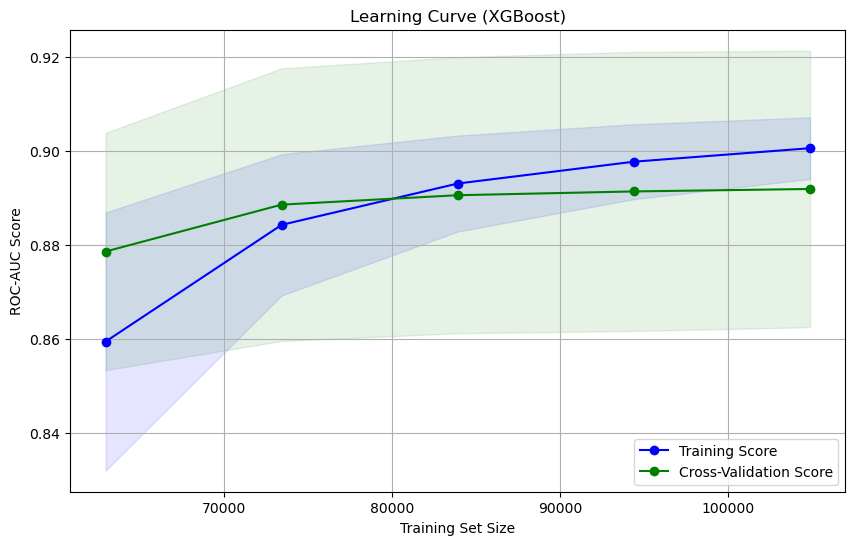

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=xgb_model,
    X=X_resampled_select,
    y=y_resampled,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='roc_auc',
    random_state=42
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_mean, 'o-', color='green', label='Cross-Validation Score')


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.1)


plt.title('Learning Curve (XGBoost)')
plt.xlabel('Training Set Size')
plt.ylabel('ROC-AUC Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### 2.1.3.3) **XGBoost ROC Curve + Kaggle Score**
This `XGBoost` model achieved an `AUC` of `0.89` and scored `0.713` on Kaggle. Although the performance is solid, improvements could be made through further `hyperparameter tuning` and `feature engineering`, such as creating new features. Another approach is that other features could have been selected, however by trial and error these were the ones that gave us better results. Additionally, exploring ensemble methods like `stacking` could boost performance by combining the strengths of multiple models.

C:\Users\Geral\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:34:16] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Geral\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:34:17] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Geral\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:34:17] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Geral\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:34:18] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Geral\anaconda3

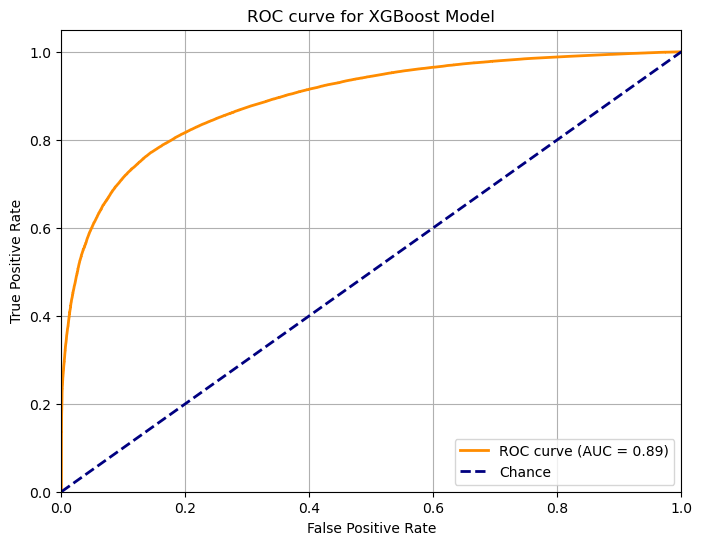

AUC = 0.89


In [ ]:
y_scores = cross_val_predict(
    xgb_model,
    X_resampled_select,
    y_resampled,
    cv=5,
    method='predict_proba'
)[:, 1]


fpr, tpr, thresholds = roc_curve(y_resampled, y_scores)


roc_auc = roc_auc_score(y_resampled, y_scores)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for XGBoost Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC = {roc_auc:.2f}")

In [ ]:
df_test_masked_pp = pd.read_csv('Processing_FINAL.csv')

X_test_masked = df_test_masked_pp[Columns]

X_test_masked["employment_status_nan*sex_Male"] = X_test_masked["employment_status_nan"] * X_test_masked["sex_Male"]

C:\Users\Geral\AppData\Local\Temp\ipykernel_3228\2769141943.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_masked["employment_status_nan*sex_Male"] = X_test_masked["employment_status_nan"] * X_test_masked["sex_Male"]


In [ ]:
X_test_masked.head()

,age,income,housing_type_Rented,employment_status_nan,housing_type_Homeowner with mortgage/loan,sex_Male,employment_status_nan*sex_Male
0,82,28900.0,0,1,0,1,1
1,40,40000.0,1,0,0,1,0
2,54,203000.0,0,0,1,0,0
3,64,0.0,0,1,0,0,0
4,35,40000.0,0,0,1,1,0


In [ ]:
y_test_masked_predictions = xgb_model.predict(X_test_masked)


y_test_masked_predictions = np.where(y_test_masked_predictions == 1, 'TRUE', 'FALSE')


submission = pd.DataFrame({
   'custid': df_test_masked_pp['custid'],
    'health_ins': y_test_masked_predictions
})


submission.to_csv('submissionxgb.csv', index=False, header=True)

#########################################################################################################
#########################################################################################################

## 2.1.4) **Decision Trees and its differences with tree ensembles**
For the decision tree models, we followed once again the same procedures as in the tree ensemble models(only the best results will be presented). It is important to distinguish them, as decision trees are individual models, whereas tree ensembles (such as random forests or gradient boosting) combine multiple decision trees to improve predictive performance. While decision trees are more prone to overfitting, ensemble methods generally offer better generalization by leveraging the diversity of multiple trees.

                                     Feature  Importance
5                     marital_status_Married    0.279689
0                                        age    0.267047
1                                     income    0.125881
6  housing_type_Homeowner with mortgage/loan    0.120705
2                        housing_type_Rented    0.080081
7                                 age*income    0.055414
3                                code_column    0.039799
4                      employment_status_nan    0.031384


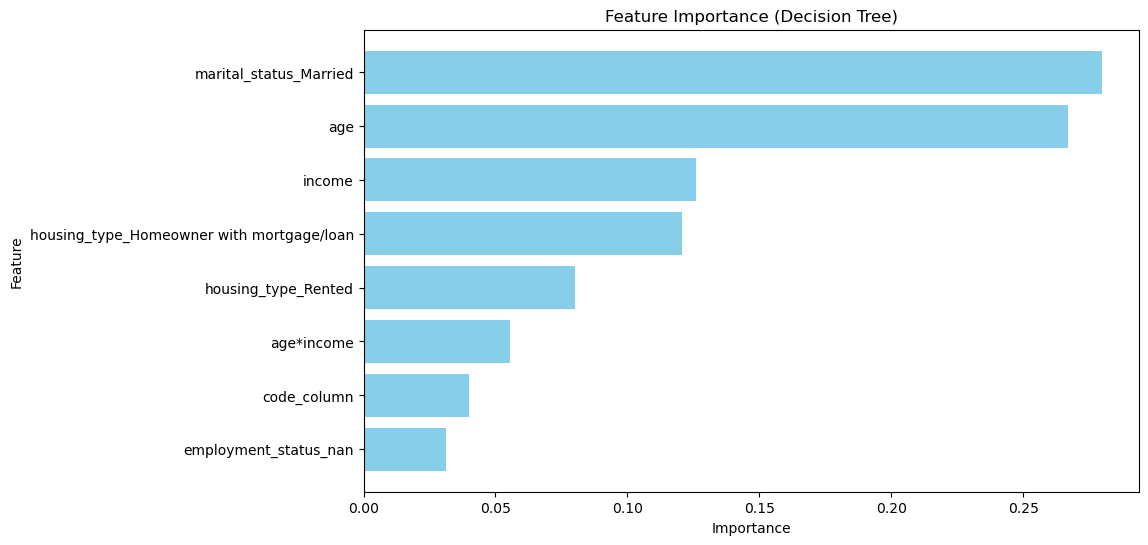

In [ ]:
# Get feature importances
importances = dt_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert axis for better readability
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Decision Tree)')
plt.show()

In [ ]:
Columns = ["marital_status_Married","age", "income", "housing_type_Rented","housing_type_Homeowner with mortgage/loan"]

X_resampled_select = X_resampled[Columns]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

param_dist = {
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random'],
}

dt_model = DecisionTreeClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_resampled_select, y_resampled)

print("Best parameters:", random_search.best_params_)
print("Best F1-score:", random_search.best_score_)

best_dt_model = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 19, 'min_samples_split': 12, 'splitter': 'best'}
Best F1-score: 0.7968300016768524


C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Geral\anaconda3\Lib\site-packages

### 2.1.4.1) **Decision Trees - Evaluation Metrics**
The model achieved an average cross-validation ROC-AUC score of 0.88, indicating strong performance. The classification report shows an accuracy of 80%, with balanced precision, recall, and F1 scores of approximately 0.80 for both classes. Precision for class 0 is 0.78, while recall is 0.82, and for class 1, precision is 0.82, with recall at 0.78. The F1 score for both classes is 0.80, reflecting a good trade-off between precision and recall. The final ROC-AUC score is 0.88.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_select, y_resampled, test_size=0.2, random_state=42)

# Define the Decision Tree model using the optimized parameters
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=7,
    max_features='log2',
    min_samples_leaf=19,
    min_samples_split=12,
    splitter='best',
    random_state=42
)

# Perform cross-validation to evaluate the model
roc_auc_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='roc_auc')  # ROC-AUC
accuracy_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')  # Accuracy

print(f"Cross-validation ROC-AUC scores: {roc_auc_cv_scores}")
print(f"Mean cross-validation ROC-AUC score: {roc_auc_cv_scores.mean()}")

print(f"Cross-validation Accuracy scores: {accuracy_cv_scores}")
print(f"Mean cross-validation Accuracy score: {accuracy_cv_scores.mean()}")

# Fit the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)
y_probs = dt_model.predict_proba(X_test)[:, 1]

# Evaluate the model performance on the test set
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Test ROC-AUC Score:", roc_auc_score(y_test, y_probs))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred))


Cross-validation ROC-AUC scores: [0.87125488 0.86857985 0.87359512 0.87159602 0.87373084]
Mean cross-validation ROC-AUC score: 0.8717513424345478
Cross-validation Accuracy scores: [0.79019879 0.79291605 0.78676646 0.79925633 0.79800725]
Mean cross-validation Accuracy score: 0.7934289746603078
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80     12994
           1       0.81      0.79      0.80     13228

    accuracy                           0.80     26222
   macro avg       0.80      0.80      0.80     26222
weighted avg       0.80      0.80      0.80     26222

Confusion Matrix:
 [[10522  2472]
 [ 2817 10411]]
Test ROC-AUC Score: 0.8754500664143144
Test Accuracy Score: 0.7982991381282892


C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _

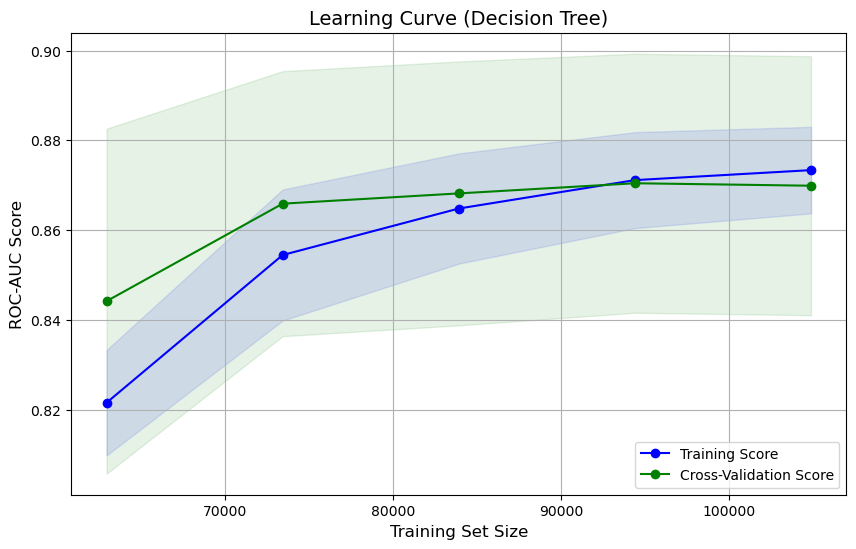

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=dt_model,
    X=X_resampled_select,
    y=y_resampled,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='roc_auc',
    random_state=42
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_mean, 'o-', color='green', label='Cross-Validation Score')


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.1)


plt.title('Learning Curve (Decision Tree)', fontsize=14)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('ROC-AUC Score', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True)


plt.show()

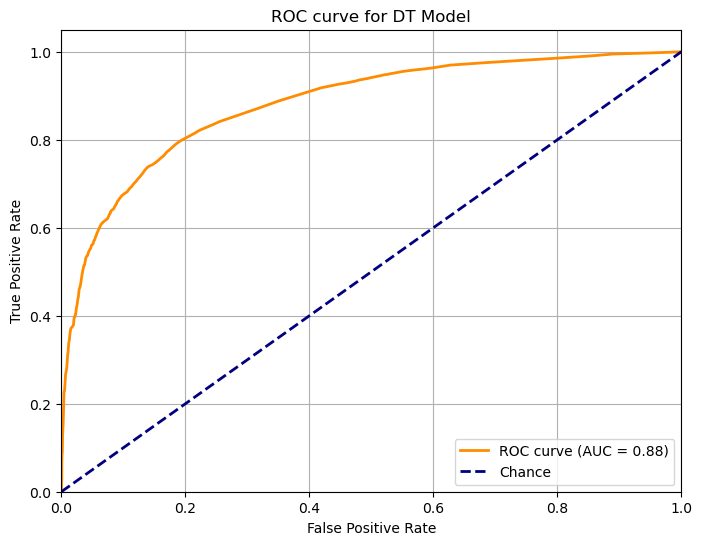

AUC = 0.88


In [ ]:
y_scores = cross_val_predict(
    dt_model,
    X_resampled_select,
    y_resampled,
    cv=5,
    method='predict_proba'
)[:, 1]


fpr, tpr, thresholds = roc_curve(y_resampled, y_scores)


roc_auc = roc_auc_score(y_resampled, y_scores)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for DT Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


print(f"AUC = {roc_auc:.2f}")

### 2.1.4) **Decision Trees - ROC Curve + Kaggle Score**
This decision tree model achieved an AUC of 0.88 and a Kaggle score of 0.6875. While these results are promising, there are several areas that could be improved. One key aspect to consider is pruning the tree to avoid overfitting. Decision trees are highly prone to overfitting, especially when they grow too deep. Implementing hyperparameter tuning such as adjusting the maximum depth, minimum samples per leaf, or minimum samples per split could help improve the model’s generalization.

In [ ]:
#################################################################
#################################################################
#################################################################
#################################################################

# Carregar o dataset pré-processado
df_test_masked_pp = pd.read_csv('Processing_FINAL.csv')


X_test_masked = df_test_masked_pp[Columns]
X_test_masked.head()

,marital_status_Married,age,income,housing_type_Rented,housing_type_Homeowner with mortgage/loan
0,1,82,28900.0,0,0
1,0,40,40000.0,1,0
2,1,54,203000.0,0,1
3,1,64,0.0,0,0
4,1,35,40000.0,0,1


In [ ]:
y_test_masked_predictions = dt_model.predict(X_test_masked)


y_test_masked_predictions = np.where(y_test_masked_predictions == 1, 'TRUE', 'FALSE')


submission = pd.DataFrame({
   'custid': df_test_masked_pp['custid'],
    'health_ins': y_test_masked_predictions
})


submission.to_csv('submissiondt.csv', index=False, header=True)

#########################################################################################################
#########################################################################################################

## 2.2) **Optimized Preprocessing**

In this section, we will optimize the preprocessing by removing outliers and standardizing the data. This typically improves model performance, and is especially important for certain models, such as:

- **Distance-based models** like `KNN` and `SVM`, which require data scaling to ensure all features contribute equally to the distance calculation.  
  - Without scaling, features with larger ranges may dominate the model’s performance.  
  - **Outliers** can also affect these models, so we will remove them to improve accuracy.

We will apply  `StandardScaler` to ensure all features are scaled before training the model. These preprocessing steps are a continuation of the preprocessing done earlier in the report.


In [ ]:
display(df)

,custid,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms,recent_move_b,employment_status_True,employment_status_nan,sex_Male,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented,included_in_rent,included_in_electricity,no_charge,gas_bill_amount,transformed_income,transformed_gas_bill_amount,transformed_gas_usage
0,000006646_03,22000.0,1,0.0,24,1047,210.0,3,0,1,0,1,0,1,0,0,0,0,0,0,0,210,9.998843,5.351858,5.351858
1,000007827_01,23200.0,1,0.0,82,1047,3.0,6,1,0,1,0,0,0,0,0,0,1,0,0,1,0,10.051951,0.000000,1.386294
2,000008359_04,21000.0,1,2.0,31,1047,40.0,3,0,1,0,0,0,1,0,1,0,0,0,0,0,40,9.952325,3.713572,3.713572
3,000008529_01,37770.0,1,1.0,93,1047,120.0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,120,10.539297,4.795791,4.795791
4,000008744_02,39000.0,1,2.0,67,1047,3.0,2,0,1,0,1,0,0,0,0,0,1,0,0,1,0,10.571343,0.000000,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72453,001506841_02,18500.0,0,1.0,25,131,10.0,4,0,1,0,0,0,1,0,0,0,1,0,0,0,10,9.825580,2.397895,2.397895
72454,001507219_01,20800.0,1,1.0,86,131,120.0,6,0,0,1,0,0,0,1,0,0,0,0,0,0,120,9.942756,4.795791,4.795791
72455,001513103_01,75000.0,1,2.0,50,131,90.0,3,0,1,0,1,1,0,0,1,0,0,0,0,0,90,11.225257,4.510860,4.510860
72456,001519624_01,22200.0,0,1.0,61,131,50.0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,50,10.007893,3.931826,3.931826


### 2.2.1) **Importance of Removing Outliers**

Outliers can significantly distort the performance of machine learning models, especially for algorithms sensitive to distance or variance, like `KNN` and `SVM`.  

- **Impact of Outliers**:  
  - Removing outliers ensures the dataset better represents the underlying data distribution, improving model robustness and performance.

- **Method Used**:  
  - We used the **Interquartile Range (IQR)** method, which is robust to skewed data.  
  - The **IQR** identifies values that lie outside the typical data range (1.5 times the IQR above the third quartile or below the first quartile).  

- **Application**:  
  - Outliers were removed only for the **income** and **gas_bill_amount** features.


In [ ]:
# IQR = Q3 - Q1
# LOWER BOUND Q1 - 1.5*IQR
# UPPER BOUND Q3 + 1.5*IQR
columns_to_check = ['income', 'gas_bill_amount']


df_no_outliers = df.copy()

for column in columns_to_check:
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]


display(df_no_outliers)

,custid,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms,recent_move_b,employment_status_True,employment_status_nan,sex_Male,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented,included_in_rent,included_in_electricity,no_charge,gas_bill_amount,transformed_income,transformed_gas_bill_amount,transformed_gas_usage
1,000007827_01,23200.0,1,0.0,82,1047,3.0,6,1,0,1,0,0,0,0,0,0,1,0,0,1,0,10.051951,0.000000,1.386294
2,000008359_04,21000.0,1,2.0,31,1047,40.0,3,0,1,0,0,0,1,0,1,0,0,0,0,0,40,9.952325,3.713572,3.713572
3,000008529_01,37770.0,1,1.0,93,1047,120.0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,120,10.539297,4.795791,4.795791
4,000008744_02,39000.0,1,2.0,67,1047,3.0,2,0,1,0,1,0,0,0,0,0,1,0,0,1,0,10.571343,0.000000,1.386294
6,000015018_01,25800.0,0,2.0,26,1047,3.0,3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,10.158169,0.000000,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72453,001506841_02,18500.0,0,1.0,25,131,10.0,4,0,1,0,0,0,1,0,0,0,1,0,0,0,10,9.825580,2.397895,2.397895
72454,001507219_01,20800.0,1,1.0,86,131,120.0,6,0,0,1,0,0,0,1,0,0,0,0,0,0,120,9.942756,4.795791,4.795791
72455,001513103_01,75000.0,1,2.0,50,131,90.0,3,0,1,0,1,1,0,0,1,0,0,0,0,0,90,11.225257,4.510860,4.510860
72456,001519624_01,22200.0,0,1.0,61,131,50.0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,50,10.007893,3.931826,3.931826


### 2.2.3) **Why Log Transformation was applied after removing outliers**

Logarithmic transformations, such as `np.log1p`, can be highly sensitive to extreme values (outliers). If outliers are present in the data, the transformation may amplify their effect or produce disproportionately large values, potentially distorting the distribution and negatively impacting the analysis or model performance.

By removing outliers from `income` and `gas_bill_amount` beforehand, the data becomes more uniform, allowing the log transformation to be applied effectively without being skewed by extreme values. This ensures a more accurate and meaningful transformation for subsequent analysis. Since we are working with distance-based models it is important to ensure this is done.


In [ ]:
df_no_outliers['transformed_income_noutliers'] = np.sign(df_no_outliers['income']) * np.log1p(abs(df_no_outliers['income']))
df_no_outliers['transformed_gasbillamount_noutliers'] = np.sign(df_no_outliers['gas_bill_amount']) * np.log1p(abs(df_no_outliers['gas_bill_amount']))
df_no_outliers = df_no_outliers.drop(columns=['transformed_income', 'transformed_gas_bill_amount', 'transformed_gas_usage'])
df_no_outliers.describe()

,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms,recent_move_b,employment_status_True,employment_status_nan,sex_Male,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented,included_in_rent,included_in_electricity,no_charge,gas_bill_amount,transformed_income_noutliers,transformed_gasbillamount_noutliers
count,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000,62746.000000
mean,30719.636519,0.896950,2.034600,48.888901,3314.801326,25.669716,3.494087,0.129235,0.597871,0.368581,0.467807,0.504781,0.276862,0.067829,0.431581,0.016160,0.326045,0.035939,0.094795,0.404153,24.231728,9.054763,1.763659
std,26407.570813,0.304027,1.155059,18.205592,2677.841169,31.760620,1.708021,0.335463,0.490332,0.482424,0.498966,0.499981,0.447451,0.251454,0.495301,0.126093,0.468768,0.186138,0.292934,0.490731,32.809194,3.191600,1.942276
min,-6900.000000,0.000000,0.000000,20.000000,131.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.839422,0.000000
25%,10000.000000,1.000000,1.000000,33.000000,1305.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.210440,0.000000
50%,24300.000000,1.000000,2.000000,48.000000,2269.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.098273,0.000000
75%,45100.000000,1.000000,3.000000,62.000000,4979.000000,40.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,40.000000,10.716660,3.713572
max,113940.000000,1.000000,6.000000,100.000000,8962.000000,120.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,120.000000,11.643436,4.795791


### 2.2.4) **Feature scaling**
`Feature scaling` is a crucial preprocessing step for machine learning models that are sensitive to the magnitude of feature values, such as `K-Nearest Neighbors (KNN)`, `Support Vector Machines (SVM)`, `Logistic Regression` etc. Without scaling:


*   `KNN`: Distances between data points can be dominated by features with large
ranges, leading to biased predictions.
*   `SVM`: The placement of the decision boundary heavily depends on feature magnitudes, affecting model performance.
*   `Logistic Regression`: Features with widely differing magnitudes can lead to numerical instability and inaccuracies in matrix operations during training.

By `standardizing` features, we ensure that all variables contribute equally to the model, improving accuracy and training stability.

In [ ]:
from sklearn.preprocessing import StandardScaler


columns_to_scale = [
    'income', 'num_vehicles', 'age', 'rooms', 'gas_usage',
    'gas_bill_amount', 'transformed_income_noutliers',
    'transformed_gasbillamount_noutliers'
]


scaler = StandardScaler()


df_scaled = df_no_outliers.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_no_outliers[columns_to_scale])


display(df_scaled)

,custid,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms,recent_move_b,employment_status_True,employment_status_nan,sex_Male,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented,included_in_rent,included_in_electricity,no_charge,gas_bill_amount,transformed_income_noutliers,transformed_gasbillamount_noutliers
1,000007827_01,-0.284755,1,-1.761483,1.818747,1047,-0.713774,1.467155,1,0,1,0,0,0,0,0,0,1,0,0,1,-0.738571,0.312444,-0.908044
2,000008359_04,-0.368065,1,-0.029955,-0.982613,1047,0.451200,-0.289277,0,1,0,0,0,1,0,1,0,0,0,0,0,0.480609,0.281229,1.003940
3,000008529_01,0.266985,1,-0.895719,2.422962,1047,2.970063,-0.874754,0,0,1,0,0,0,1,0,0,0,0,0,0,2.918969,0.465141,1.561135
4,000008744_02,0.313563,1,-0.029955,0.994818,1047,-0.713774,-0.874754,0,1,0,1,0,0,0,0,0,1,0,0,1,-0.738571,0.475182,-0.908044
6,000015018_01,-0.186298,0,-0.029955,-1.257256,1047,-0.713774,-0.289277,0,1,0,0,1,0,0,0,0,1,0,0,1,-0.738571,0.345724,-0.908044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72453,001506841_02,-0.462736,0,-0.895719,-1.312184,131,-0.493373,0.296200,0,1,0,0,0,1,0,0,0,1,0,0,0,-0.433776,0.241516,0.326546
72454,001507219_01,-0.375639,1,-0.895719,2.038461,131,2.970063,1.467155,0,0,1,0,0,0,1,0,0,0,0,0,0,2.918969,0.278230,1.561135
72455,001513103_01,1.676819,1,-0.029955,0.061031,131,2.025489,-0.289277,0,1,0,1,1,0,0,1,0,0,0,0,0,2.004584,0.680070,1.414435
72456,001519624_01,-0.322624,0,-0.895719,0.665246,131,0.766058,1.467155,0,1,0,0,0,0,0,0,0,0,0,0,0,0.785404,0.298639,1.116311


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_scaled.corr()

# Display the correlation between features and the target variable (health_ins)
print(correlation_matrix['health_ins'].sort_values(ascending=False))

health_ins                                   1.000000
transformed_income_noutliers                 0.190395
income                                       0.172521
age                                          0.172487
marital_status_Married                       0.098547
housing_type_Homeowner with mortgage/loan    0.078384
marital_status_Widowed                       0.062246
transformed_gasbillamount_noutliers          0.060164
gas_bill_amount                              0.053529
gas_usage                                    0.052292
employment_status_nan                        0.037515
num_vehicles                                 0.032392
included_in_electricity                      0.026654
custid                                       0.002601
employment_status_True                      -0.002691
rooms                                       -0.007680
included_in_rent                            -0.008624
housing_type_Occupied with no rent          -0.025155
code_column                 

### 2.2.5) **Variables used for the models that will use the optimized preprocessing**
The used variables for the `KNN` model,`SVM` model, `GNB` model and `GB` model will be the ones with most and less correlation with health insurance. We will once again apply smote to our X(`X_scaled`) and y(`y_scaled`).

In [ ]:
# Define the inputs and target

X_scaled = df_scaled.drop(columns=["health_ins", "custid","code_column"])  # Drop the target column to keep features, also the custid
#and code_column
X_scaled = df_scaled[["transformed_income_noutliers","age","marital_status_Married","housing_type_Homeowner with mortgage/loan",
                      "housing_type_Rented","marital_status_Never married","no_charge","sex_Male",
                     "recent_move_b"]]
y_scaled = df_scaled["health_ins"]
X_scaled.head()

,transformed_income_noutliers,age,marital_status_Married,housing_type_Homeowner with mortgage/loan,housing_type_Rented,marital_status_Never married,no_charge,sex_Male,recent_move_b
1,0.312444,1.818747,0,0,1,0,1,0,1
2,0.281229,-0.982613,0,1,0,1,0,0,0
3,0.465141,2.422962,0,0,0,0,0,0,0
4,0.475182,0.994818,0,0,1,0,1,1,0
6,0.345724,-1.257256,1,0,1,0,1,0,0


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_scaled)
from collections import Counter
print(f"Original Distribution: {Counter(y_scaled)}")
print(f"Pos-SMOTE Distribution: {Counter(y_resampled)}")

Original Distribution: Counter({1: 56280, 0: 6466})
Pos-SMOTE Distribution: Counter({1: 56280, 0: 56280})


## 2.3) **Models with optimized preprocessing**
In this section, we present the results for the **models with optimized preprocessing**, showcasing their best performance metrics, including **Accuracy**, **Precision**, **Recall**, **F1-score**, **AUC** on the training set, and **F1-score/Kaggle score** on the test set. The table below summarizes the results:
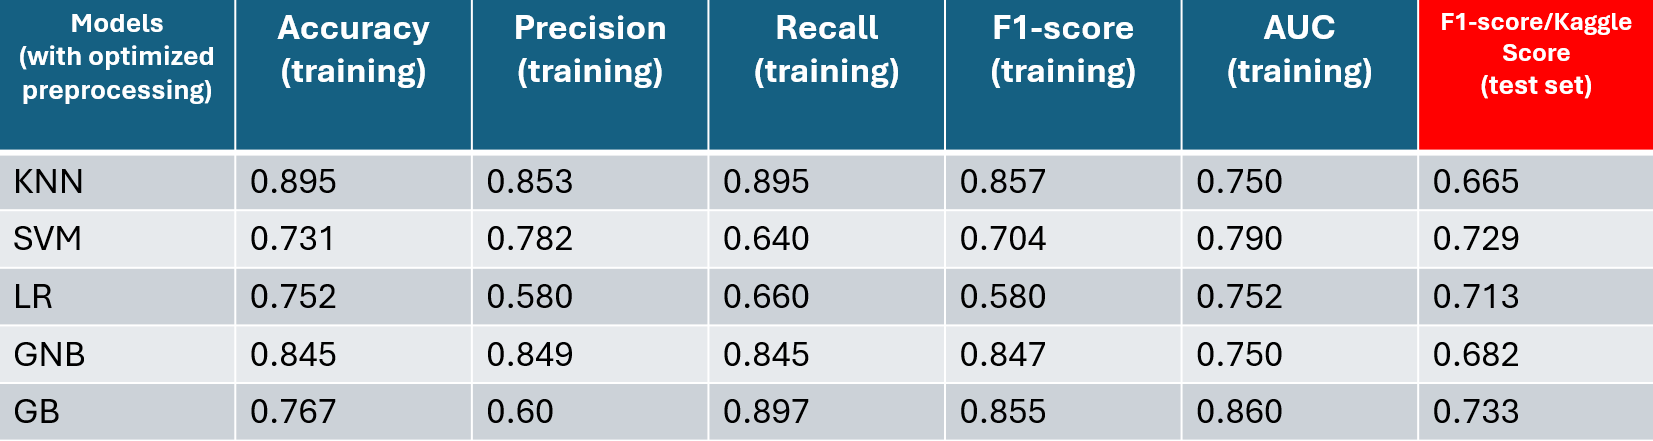
KNN - K-nearest neighbors | SVM - Support Vector Machine | LR - Logistic Regression | GNB - Gaussian Naive Bayes | GB - Gradient Boosting

In the sections below it will be explained with some detail how we achieved these results and how these models work.

## 2.3.1) **K-Nearest Neighbors (KNN) Model**

**K-Nearest Neighbors (KNN)** is a simple and effective classification algorithm.  
It predicts the class of a data point based on the **majority class** of its nearest neighbors.

- **Key Concept**:  
  - The number of neighbors (**k**) is a critical parameter.  
  - Model performance varies with different values of **k**.  

### KNN Model Evaluation  

- **Data Split**:  
  - **80%** for training.  
  - **20%** for testing.  

- **Methodology**:  
  - Evaluated model performance by varying **k** (from 1 to 24).  
  - **Accuracy** was calculated for both training and test sets.  
  - Results were stored in dictionaries for comparison.

- **Visualization**:  
  - Plotted accuracy vs. **number of neighbors (k)**.  
  - Identified how increasing or decreasing **k** affects performance.

- **Optimal k**:  
  - The value of **k = 19** was chosen as it provided the best balance of performance.  

The resulting plot below shows the relationship between **k** and model accuracy, highlighting the optimal choice.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialize dictionaries to store the accuracies
neighbors = np.arange(1, 25)  # Array of neighbors from 1 to 24
train_accuracies = {}  # Dictionary to store the accuracy of the training set
test_accuracies = {}   # Dictionary to store the accuracy of the test set

# Loop to evaluate the performance for different numbers of neighbors
for neighbor in neighbors:
    # Create the KNN classifier with the current number of neighbors
    knn = KNeighborsClassifier(n_neighbors=neighbor)

    # Fit the model to the training data
    knn.fit(X_train, y_train)

    # Compute the accuracy for the training set
    train_accuracies[neighbor] = knn.score(X_train, y_train)

    # Compute the accuracy for the test set
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# Print the results
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
 {1: 0.9630050203203443, 2: 0.9050322734879274, 3: 0.9161486971073393, 4: 0.9049924296756714, 5: 0.9063869631046299, 6: 0.9028209419077218, 7: 0.9031795362180254, 8: 0.901705315164555, 9: 0.9020838313809866, 10: 0.9009881265439478, 11: 0.9006096103275162, 12: 0.9002709379233405, 13: 0.8993744521475815, 14: 0.8992349988046856, 15: 0.898916248306638, 16: 0.898816638775998, 17: 0.8987369511514862, 18: 0.8992549207108136, 19: 0.8986572635269743, 20: 0.898916248306638, 21: 0.898876404494382, 22: 0.89889632640051, 23: 0.8986572635269743, 24: 0.8987568730576142} 
 {1: 0.8400796812749004, 2: 0.7904382470119522, 3: 0.8742629482071713, 4: 0.8539442231075697, 5: 0.8839043824701195, 6: 0.8749003984063745, 7: 0.8893227091633467, 8: 0.8843824701195219, 9: 0.8917131474103586, 10: 0.8890836653386455, 11: 0.8923505976095617, 12: 0.8908366533864542, 13: 0.894581673306773, 14: 0.8928286852589642, 15: 0.8949003984063745, 16: 0.8942

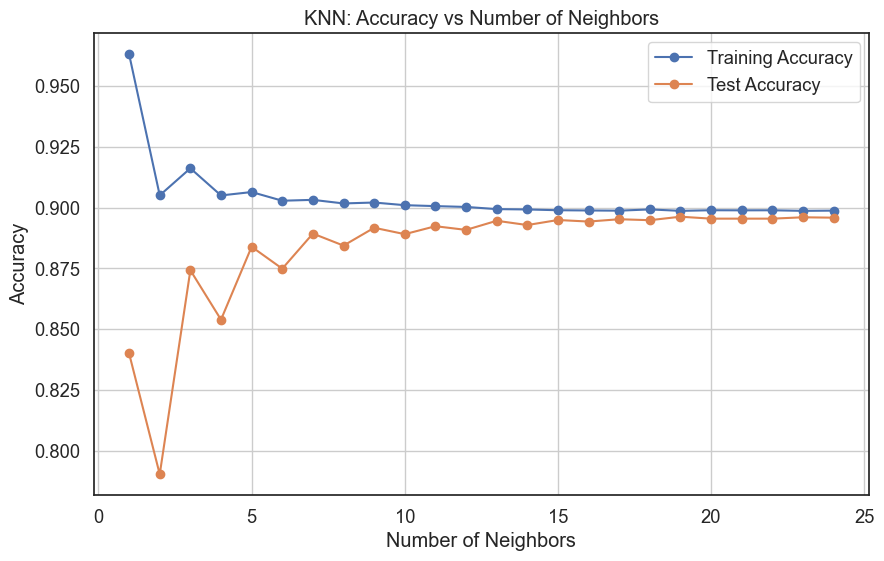

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(neighbors, list(train_accuracies.values()), label='Training Accuracy', marker='o')
plt.plot(neighbors, list(test_accuracies.values()), label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

### 2.3.1.1) **KNN Model Evaluation with Cross-Validation + Kaggle Score**

- **Model Configuration**:  
  - **KNN classifier** with **19 neighbors**.  
  - **5-fold cross-validation** was performed.

- **Evaluation Metrics**:  
  - **Average Accuracy**: 0.895  
  - **Precision**: 0.853  
  - **Recall**: 0.895  
  - **F1 Score**: 0.857  

- **AUC Performance**:  
  - **AUC Score**: 0.75  
  - ROC curve was generated to assess class separation.

- **F1-Score on test set / Kaggle Score**:  
  - **Kaggle score**: 0.665.  
- **Potential Improvements**:  
  - Explore alternative **distance metrics** (e.g., Manhattan).  
  - Experiment with **different scaling techniques** (e.g., Min-Max Scaling).
  - Select other features




In [ ]:
from sklearn.model_selection import cross_val_score


knn = KNeighborsClassifier(n_neighbors=19)


cv_scores = cross_val_score(knn, X_scaled, y_scaled, cv=5, scoring='accuracy')


print("Cross-validation, validation for each fold: ", cv_scores)
print("Average accuracy: ", cv_scores.mean())

Cross-validation, validation for each fold:  [0.89418327 0.8950514  0.8944139  0.89815922 0.89473265]
Average accuracy:  0.8953080853730666


In [ ]:

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
y_train_predictions = cross_val_predict(knn, X_scaled, y_scaled, cv=5)


conf_matrix_train = confusion_matrix(y_scaled, y_train_predictions)
print("Confusion Matrix :", conf_matrix_train)


precision = precision_score(y_scaled, y_train_predictions, average='weighted')
recall = recall_score(y_scaled, y_train_predictions, average='weighted')
f1 = f1_score(y_scaled, y_train_predictions, average='weighted')


print("Precision : %.3f; Recall : %.3f; F1 : %.3f" % (precision, recall, f1))

Confusion Matrix : [[  335  6131]
 [  438 55842]]
Precision : 0.853; Recall : 0.895; F1 : 0.857


In [ ]:
knn.fit(X_scaled, y_scaled)

KNeighborsClassifier(n_neighbors=19)

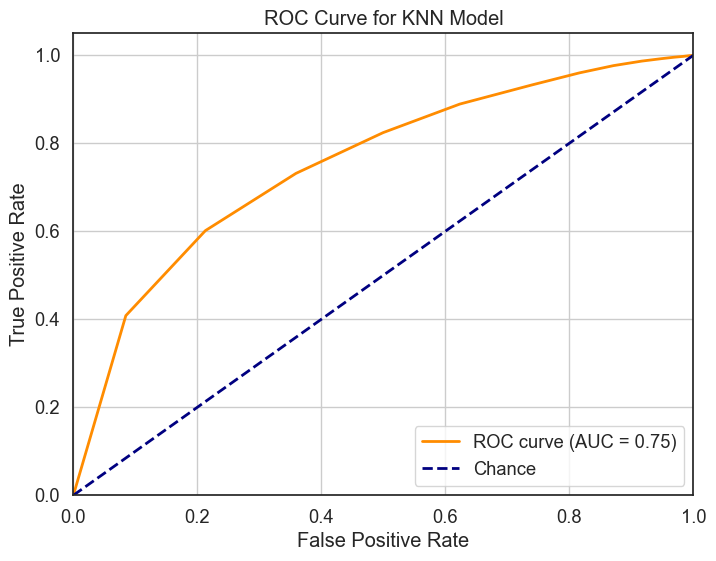

AUC = 0.75


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with 19 neighbors
knn = KNeighborsClassifier(n_neighbors=19)

# Get the predicted probabilities for the positive class
y_scores = cross_val_predict(
    knn,            # KNN model
    X_scaled,       # Input features (after SMOTE)
    y_scaled,       # Target labels (after SMOTE)
    cv=5,           # 5-fold cross-validation
    method='predict_proba'  # Get probabilities
)[:, 1]  # We are interested in the probabilities of the positive class

# Calculate the false positive rate (fpr), true positive rate (tpr) and thresholds
fpr, tpr, thresholds = roc_curve(y_scaled, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_scaled, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC score
print(f"AUC = {roc_auc:.2f}")

In [ ]:
#################################################################
#################################################################
#################################################################
#################################################################


df_test_masked_pp = pd.read_csv('Processing_FINAL.csv')
df_test_masked_pp = df_test_masked_pp.rename(columns={"transformed_income": "transformed_income_noutliers"})
X_test_masked = df_test_masked_pp[["transformed_income_noutliers","age","marital_status_Married","housing_type_Homeowner with mortgage/loan"
                     ,"housing_type_Rented","marital_status_Never married","no_charge","sex_Male",
                     "recent_move_b"]]
X_test_masked.head()

,transformed_income_noutliers,age,marital_status_Married,housing_type_Homeowner with mortgage/loan,housing_type_Rented,marital_status_Never married,no_charge,sex_Male,recent_move_b
0,10.271631,82,1,0,0,0,0,1,0
1,10.596660,40,0,0,1,1,0,1,1
2,12.220966,54,1,1,0,0,0,0,0
3,0.000000,64,1,0,0,0,0,0,0
4,10.596660,35,1,1,0,0,0,1,0


### 2.3.1.2) **Customer_test_masked csv preprocessing**
It is of the utmost importance to ensure that the `X` of `Processing_FINAL.csv` undergoes the same preprocessing as the `X_scaled` of `customer.csv`. This is why we will apply standardization to some of the features.

Note: In the code above the "transformed_income" column in the Processing_FINAL.csv corresponds to the "transformed_income_noutliers" in the preprocessed dataset, however since the model was fitted with the "transformed_income_noutliers" we had to change its name(both suffered same preprocessing).

In [ ]:
from sklearn.preprocessing import StandardScaler


columns_to_scale = ["transformed_income_noutliers", "age"]


X_test_scaled = X_test_masked.copy()


scaler = StandardScaler()
X_test_scaled[columns_to_scale] = scaler.fit_transform(X_test_masked[columns_to_scale])

print(X_test_scaled.head())

   transformed_income_noutliers       age  marital_status_Married  \
0                      0.477453  2.195960                       1   
1                      0.564687 -0.306087                       0   
2                      1.000631  0.527929                       1   
3                     -2.279326  1.123654                       1   
4                      0.564687 -0.603950                       1   

   housing_type_Homeowner with mortgage/loan  housing_type_Rented  \
0                                          0                    0   
1                                          0                    1   
2                                          1                    0   
3                                          0                    0   
4                                          1                    0   

   marital_status_Never married  no_charge  sex_Male  recent_move_b  
0                             0          0         1              0  
1                             

In [ ]:
y_test_masked_predictions = knn.predict(X_test_scaled)


y_test_masked_predictions = np.where(y_test_masked_predictions == 1, 'TRUE', 'FALSE')


submission = pd.DataFrame({
   'custid': df_test_masked_pp['custid'],
    'health_ins': y_test_masked_predictions
})


submission.to_csv('submissionknn.csv', index=False, header=True)

#########################################################################################################
#########################################################################################################

## 2.3.2) **Support Vector Machines (SVM) Model**
For the `SVM` model, we decided to use the same logic as in the `KNN` model(selecting the variables with most/less correlation with health insurance).

In [ ]:
# Define the inputs and target

X_scaled = df_scaled.drop(columns=["health_ins", "custid","code_column"])  # Drop the target column to keep features, also the custid
#and code_column
X_scaled = df_scaled[["transformed_income_noutliers","age","marital_status_Married","housing_type_Homeowner with mortgage/loan",
                     "housing_type_Rented","marital_status_Never married","no_charge","sex_Male",
                     "recent_move_b"]]
y_scaled = df_scaled["health_ins"]
X_scaled.head()

,transformed_income_noutliers,age,marital_status_Married,housing_type_Homeowner with mortgage/loan,marital_status_Married,housing_type_Rented,marital_status_Never married,no_charge,sex_Male,recent_move_b
1,0.312444,1.818747,0,0,0,1,0,1,0,1
2,0.281229,-0.982613,0,1,0,0,1,0,0,0
3,0.465141,2.422962,0,0,0,0,0,0,0,0
4,0.475182,0.994818,0,0,0,1,0,1,1,0
6,0.345724,-1.257256,1,0,1,1,0,1,0,0


In [ ]:
smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_scaled)
from collections import Counter
print(f"Original Distribution: {Counter(y)}")
print(f"Pos-SMOTE Distribution: {Counter(y_resampled)}")

Original Distribution: Counter({1: 65553, 0: 6905})
Pos-SMOTE Distribution: Counter({1: 56280, 0: 56280})


### 2.3.2.1) **SVM Parameters**
The chosen `SVM parameters` were tailored to the complexity of this binary classification problem, and we chose them because they gave us better results after `trial and error`(except the kernel one that was done a GridSearch(this isn't included in the report).

1. `Kernel` = 'rbf': Captures non-linear relationships between features, essential for complex interactions in health insurance prediction.
2. `C` = 1.0: Balances model complexity and accuracy, reducing the risk of overfitting while maintaining good generalization.
3. `Gamma` = 'scale': Automatically adapts to the dataset, ensuring effective learning from scaled features.
4. `random_state` = 42: Ensures reproducible and consistent results.


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict


svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)


y_train_pred = cross_val_predict(svm_model, X_resampled, y_resampled, cv=5, n_jobs=-1)  


print("Evaluation Metrics (cross validation):")
print("Accuracy:", accuracy_score(y_resampled, y_train_pred))
print("Precision:", precision_score(y_resampled, y_train_pred))
print("Recall:", recall_score(y_resampled, y_train_pred))
print("F1 Score:", f1_score(y_resampled, y_train_pred))


conf_matrix = confusion_matrix(y_resampled, y_train_pred)
print("\nConfusion Matrix (cross validation):\n", conf_matrix)


svm_model.fit(X_resampled, y_resampled)


Evaluation Metrics (cross validation):
Accuracy: 0.7311922530206112
Precision: 0.7823247336559116
Recall: 0.640636105188344
F1 Score: 0.704426231109635

Confusion Matrix (cross validation):
 [[46248 10032]
 [20225 36055]]


SVC(random_state=42)

### 2.3.2.2) **SVM - Evaluation Metrics + Kaggle Score**

- **Evaluation Metrics** (with cross-validation):  
  - **Accuracy**: 0.731  
  - **Precision**: 0.782  
  - **Recall**: 0.641  
  - **F1 Score**: 0.704  

- **Performance**:  
  - **AUC**: 0.79  
  - **Kaggle Score**: 0.729 (best score so far).  

- **Hyperparameter Tuning**:  
  - **Randomized Search** and **GridSearch** were attempted.  
  - Only the **kernel** was optimized due to computational limitations.  
  - **RBF kernel** performed best.  

- **Potential Improvements**:  
  - More extensive **hyperparameter optimization**.  
  - Requires better **computational resources** for a thorough search.  




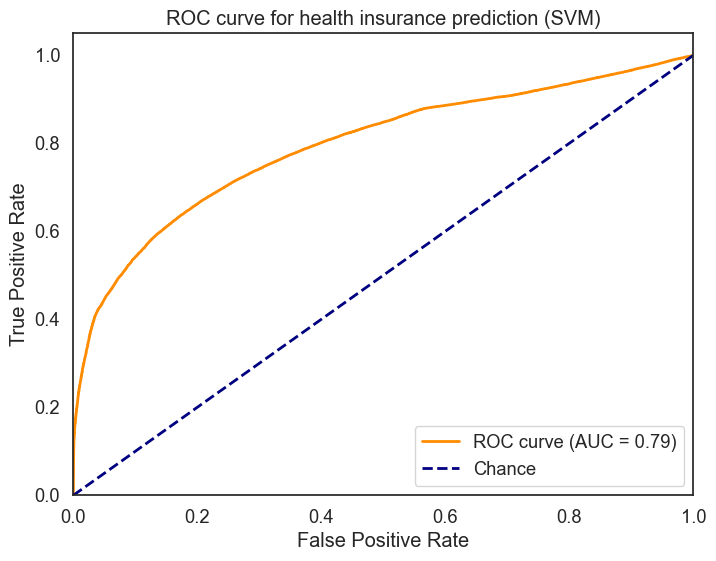

AUC = 0.79


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt


y_scores = cross_val_predict(
    svm_model,
    X_resampled,
    y_resampled,
    cv=5,
    method='decision_function',
    n_jobs=-1  
)

# Calculating false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_resampled, y_scores)
roc_auc = roc_auc_score(y_resampled, y_scores)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for health insurance prediction (SVM)')
plt.legend(loc="lower right")
plt.show()


print(f"AUC = {roc_auc:.2f}")


In [ ]:
print(X_test_scaled.head())

   transformed_income_noutliers       age  marital_status_Married  \
0                      0.477453  2.195960                       1   
1                      0.564687 -0.306087                       0   
2                      1.000631  0.527929                       1   
3                     -2.279326  1.123654                       1   
4                      0.564687 -0.603950                       1   

   housing_type_Homeowner with mortgage/loan  marital_status_Married  \
0                                          0                       1   
1                                          0                       0   
2                                          1                       1   
3                                          0                       1   
4                                          1                       1   

   housing_type_Rented  marital_status_Never married  no_charge  sex_Male  \
0                    0                             0          0         1  

In [ ]:
y_test_masked_predictions = svm_model.predict(X_test_scaled)


y_test_masked_predictions = np.where(y_test_masked_predictions == 1, 'TRUE', 'FALSE')


submission = pd.DataFrame({
   'custid': df_test_masked_pp['custid'],
    'health_ins': y_test_masked_predictions
})


submission.to_csv('submissionsvm.csv', index=False, header=True)

#########################################################################################################
#########################################################################################################

## 2.3.3) **Logistic Regression**

For Logistic Regression, we will use the same preprocessing steps as the ones used in the distance-based models, even though it is a linear model, because it is sensitive to outliers and requires feature scaling.

We start by plotting the feature importances, selecting the highest coefficients.

                                     Feature  Coefficient
1                                        age     0.559539
2                     marital_status_Married     0.519447
0               transformed_income_noutliers     0.463853
3  housing_type_Homeowner with mortgage/loan     0.323129
5               marital_status_Never married     0.271668
8                              recent_move_b     0.055925
4                        housing_type_Rented    -0.333742
6                                  no_charge    -0.403775
7                                   sex_Male    -0.644254


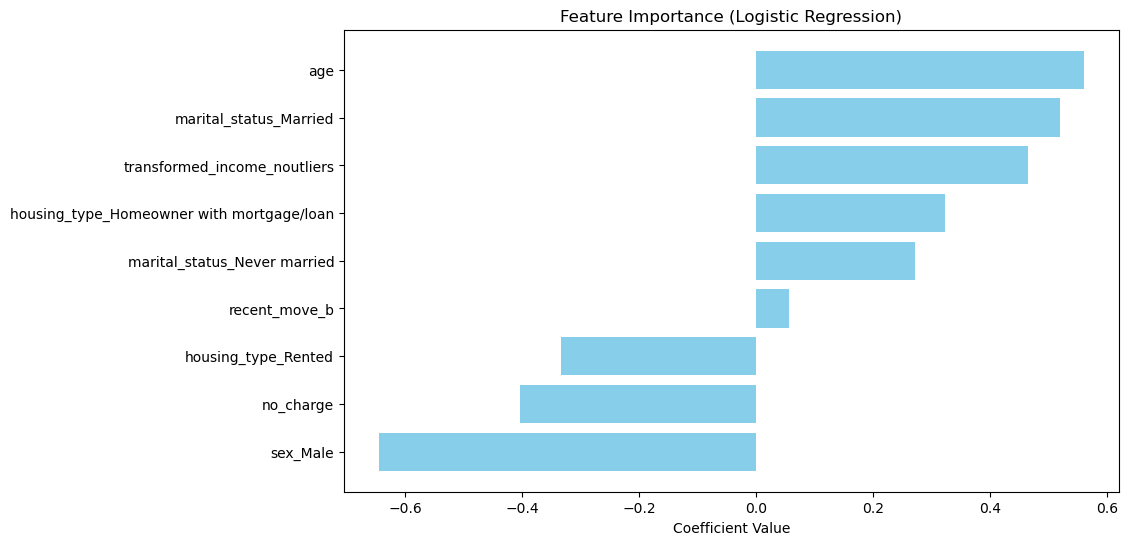

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Get the coefficients of the model
coefficients = lr_model.coef_[0]  # For binary classification, it's a 1D array

# We created a DataFrame to display features and their corresponding coefficients
feature_importance_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)


print(feature_importance_lr)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_lr['Feature'], feature_importance_lr['Coefficient'], color='skyblue')
plt.gca().invert_yaxis()  
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.show()


In [ ]:
Columns = ["transformed_income_noutliers","age","marital_status_Married","housing_type_Homeowner with mortgage/loan",
            "housing_type_Rented","marital_status_Never married","no_charge","sex_Male"]


X_train_select = X_train[Columns].copy()
X_train_select["age*transf_income"] = X_train["age"] * X_train["transformed_income_noutliers"] # We creat an interaction between age and income for obtaining better results.


X_test_select = X_test[Columns].copy()
X_test_select["age*transf_income"] = X_test["age"] * X_test["transformed_income_noutliers"]  # we add the same interaction to the X_test to prevent errors


After selecting the columns we did a random search for searching for the best parameters.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Step 1: Define the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', solver='saga')

# Step 2: Define the hyperparameter space for Randomized Search
param_distributions = {
    'C': uniform(0.01, 10),  # Regularization strength (smaller values = stronger regularization)
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization types
    'l1_ratio': uniform(0, 1)  # ElasticNet mixing parameter (only used if penalty='elasticnet')
}

# Step 3: Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter combinations to test
    scoring='f1',  # Optimize for ROC-AUC
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Step 4: Fit RandomizedSearchCV on the standardized training data
random_search.fit(X_train_select, y_train)

# Step 5: View best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best ROC-AUC Score:", random_search.best_score_)

# Step 6: Use the best model for predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_select)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Best Parameters: {'C': np.float64(0.16636406741193932), 'l1_ratio': np.float64(0.4234014807063696), 'penalty': 'l1'}
Best ROC-AUC Score: 0.786016415297221


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression(
    max_iter=1000,
    penalty='l1',
    l1_ratio=0.42,
    C=0.166,
    solver="saga",
    random_state=42,
    class_weight="balanced"
)

# Cross-validation setup using StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation for ROC-AUC scores
roc_auc_scores = cross_val_score(lr_model, X_train_select, y_train, cv=skf, scoring='roc_auc')
print("Cross-validation ROC-AUC scores:", roc_auc_scores)
print("Mean ROC-AUC score:", roc_auc_scores.mean())

# Cross-validation for Accuracy scores
accuracy_scores = cross_val_score(lr_model, X_train_select, y_train, cv=skf, scoring='accuracy')
print("Cross-validation Accuracy scores:", accuracy_scores)
print("Mean Accuracy score:", accuracy_scores.mean())

# Train the model on the entire training set
lr_model.fit(X_train_select, y_train)

# Experiment with prediction thresholds
y_probs = lr_model.predict_proba(X_test_select)[:, 1]
threshold = 0.4  # Adjusted threshold
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluate the adjusted predictions
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))
print("Test ROC-AUC Score:", roc_auc_score(y_test, y_probs))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred_adjusted))


C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Geral\anaconda3\Lib\site-packag

Cross-validation ROC-AUC scores: [0.74774326 0.76089009 0.76242782 0.76506341 0.76712803]
Mean ROC-AUC score: 0.7606505198860036


C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Cross-validation Accuracy scores: [0.66743028 0.67098317 0.6729754  0.67516685 0.67915131]
Mean Accuracy score: 0.673141399934677
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.54      0.31      1293
           1       0.94      0.78      0.85     11257

    accuracy                           0.75     12550
   macro avg       0.58      0.66      0.58     12550
weighted avg       0.86      0.75      0.79     12550

Confusion Matrix:
 [[ 703  590]
 [2521 8736]]
Test ROC-AUC Score: 0.7515299408785844
Test Accuracy Score: 0.7521115537848606


C:\Users\Geral\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_rat

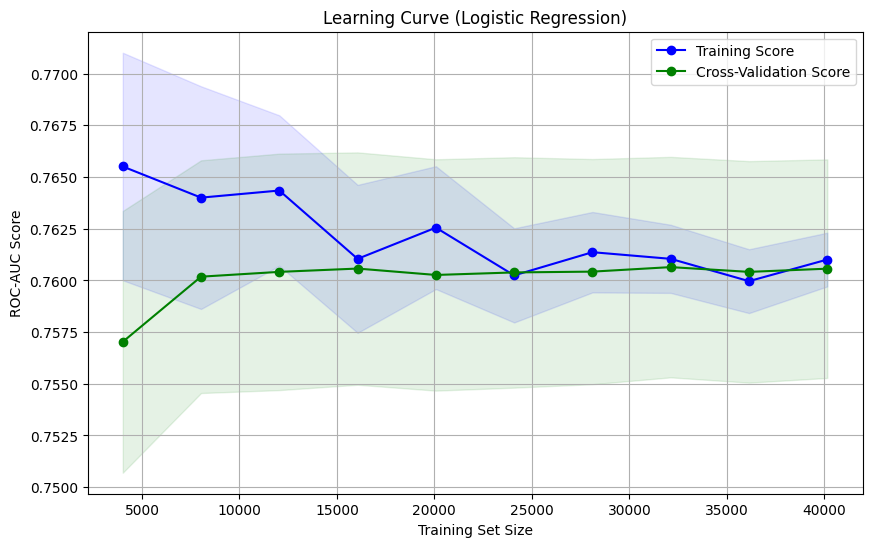

In [ ]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=lr_model,
    X=X_train_select,  # X train
    y=y_train,  # Target variable
    train_sizes=np.linspace(0.1, 1.0, 10),  # Fractions of the training data to use
    cv=5,  # Number of cross-validation splits
    scoring='roc_auc',  # Metric to evaluate (ROC-AUC in this case)
)

# Compute mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_mean, 'o-', color='green', label='Cross-Validation Score')

# Fill in the area for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.1)

# Add labels and legend
plt.title('Learning Curve (Logistic Regression)')
plt.xlabel('Training Set Size')
plt.ylabel('ROC-AUC Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

We achieved a score of 0.713 on Kaggle with this model!

In [ ]:
df_test_masked_pp = pd.read_csv('Processing_FINAL.csv')
df_test_masked_pp = df_test_masked_pp.rename(columns={"transformed_income": "transformed_income_noutliers"})
X_test_masked = df_test_masked_pp[["transformed_income_noutliers","age","marital_status_Married","housing_type_Homeowner with mortgage/loan"
                     ,"housing_type_Rented","marital_status_Never married","no_charge","sex_Male",]]
X_test_masked.head()

,transformed_income_noutliers,age,marital_status_Married,housing_type_Homeowner with mortgage/loan,housing_type_Rented,marital_status_Never married,no_charge,sex_Male
0,10.271631,82,1,0,0,0,0,1
1,10.596660,40,0,0,1,1,0,1
2,12.220966,54,1,1,0,0,0,0
3,0.000000,64,1,0,0,0,0,0
4,10.596660,35,1,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ["transformed_income_noutliers", "age"]

X_test_scaled = X_test_masked.copy()


scaler = StandardScaler()
X_test_scaled[columns_to_scale] = scaler.fit_transform(X_test_masked[columns_to_scale])

X_test_scaled["age*transf_income"] = X_test_scaled["age"] * X_test_scaled["transformed_income_noutliers"]

print(X_test_scaled.head())

   transformed_income_noutliers       age  marital_status_Married  \
0                      0.477453  2.195960                       1   
1                      0.564687 -0.306087                       0   
2                      1.000631  0.527929                       1   
3                     -2.279326  1.123654                       1   
4                      0.564687 -0.603950                       1   

   housing_type_Homeowner with mortgage/loan  housing_type_Rented  \
0                                          0                    0   
1                                          0                    1   
2                                          1                    0   
3                                          0                    0   
4                                          1                    0   

   marital_status_Never married  no_charge  sex_Male  age*transf_income  
0                             0          0         1           1.048468  
1                     

In [ ]:
y_test_masked_predictions = lr_model.predict(X_test_scaled)


y_test_masked_predictions = np.where(y_test_masked_predictions == 1, 'TRUE', 'FALSE')


submission = pd.DataFrame({
   'custid': df_test_masked_pp['custid'],
    'health_ins': y_test_masked_predictions
})


submission.to_csv('submissionlr.csv', index=False, header=True)

## 2.3.4) **Gradient Boosting**

In this subsection, we introduce the **Gradient Boosting** model, a powerful ensemble technique widely used for classification and regression tasks. Gradient Boosting builds models sequentially by combining weak learners, typically decision trees, in order to minimize errors and improve predictive performance.

### Key Characteristics:
- **Ensemble Method**: Combines multiple weak learners to form a strong model.
- **Boosting Mechanism**: Focuses on correcting errors from previous iterations to improve accuracy.
- **Flexibility**: Handles both classification and regression problems effectively.


In [ ]:
# Define the inputs and target

X_scaled = df_scaled.drop(columns=["health_ins", "custid","code_column"])  # Drop the target column to keep features, also the custid
#and code_column
X_scaled = df_scaled[["transformed_income_noutliers","age","marital_status_Married","housing_type_Homeowner with mortgage/loan",
                     "housing_type_Rented","marital_status_Never married","no_charge","sex_Male",
                     "recent_move_b"]]
y_scaled = df_scaled["health_ins"]
X_scaled.head()

,transformed_income_noutliers,age,marital_status_Married,housing_type_Homeowner with mortgage/loan,housing_type_Rented,marital_status_Never married,no_charge,sex_Male,recent_move_b
1,0.312444,1.818747,0,0,1,0,1,0,1
2,0.281229,-0.982613,0,1,0,1,0,0,0
3,0.465141,2.422962,0,0,0,0,0,0,0
4,0.475182,0.994818,0,0,1,0,1,1,0
6,0.345724,-1.257256,1,0,1,0,1,0,0


In [ ]:
smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_scaled)
from collections import Counter
print(f"Original Distribution: {Counter(y)}")
print(f"Pos-SMOTE Distribution: {Counter(y_resampled)}")

Original Distribution: Counter({1: 65553, 0: 6905})
Pos-SMOTE Distribution: Counter({1: 56280, 0: 56280})


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
cv_accuracy = cross_val_score(gb_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy for each fold: {cv_accuracy}")
print(f"Average accuracy: {cv_accuracy.mean():.3f}")

Cross-validation accuracy for each fold: [0.72876688 0.77038913 0.78176084 0.77367626 0.77842928]
Average accuracy: 0.767


Precision: 0.860
Recall: 0.897
F1-Score: 0.855


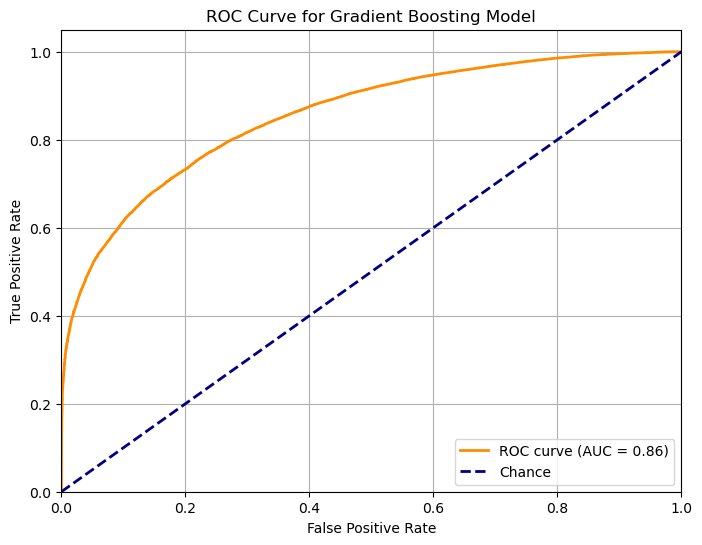

AUC = 0.86


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred = cross_val_predict(gb_model, X_scaled, y_scaled, cv=5)

precision = precision_score(y_scaled, y_pred, average='weighted')
recall = recall_score(y_scaled, y_pred, average='weighted')
f1 = f1_score(y_scaled, y_pred, average='weighted')

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
gb_model.fit(X_resampled, y_resampled)
y_scores = cross_val_predict(gb_model, X_resampled, y_resampled, cv=5, method='predict_proba')[:, 1]

fpr, tpr, thresholds = roc_curve(y_resampled, y_scores)
roc_auc = roc_auc_score(y_resampled, y_scores)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


print(f"AUC = {roc_auc:.2f}")

## 2.3.4.1) **Gradient Boosting - Evaluation Metrics**

In this subsection, we evaluated the performance of the **Gradient Boosting** model using key metrics obtained through cross-validation and test set evaluation. The following results were achieved:

### Cross-Validation Results:
- **Cross-validation accuracy for each fold**:  
  [0.7288, 0.7704, 0.7818, 0.7737, 0.7784]  
- **Average Accuracy**: 0.767  

### Performance Metrics on the Training Set:
- **Precision**: 0.860  
- **Recall**: 0.897  
- **F1-Score**: 0.855  
- **AUC**: 0.86  

### Test Set Results:
- **Kaggle Score / F1-Score**: 0.733  

These metrics demonstrate the model's robustness and effectiveness, with consistent performance across the folds in cross-validation and a competitive F1-Score on the test set.


In [ ]:
print(X_test_scaled.head())

   transformed_income_noutliers       age  marital_status_Married  \
0                      0.477453  2.195960                       1   
1                      0.564687 -0.306087                       0   
2                      1.000631  0.527929                       1   
3                     -2.279326  1.123654                       1   
4                      0.564687 -0.603950                       1   

   housing_type_Homeowner with mortgage/loan  housing_type_Rented  \
0                                          0                    0   
1                                          0                    1   
2                                          1                    0   
3                                          0                    0   
4                                          1                    0   

   marital_status_Never married  no_charge  sex_Male  recent_move_b  
0                             0          0         1              0  
1                             

In [ ]:

y_test_masked_predictions = gb_model.predict(X_test_scaled)


y_test_masked_predictions = np.where(y_test_masked_predictions == 1, 'TRUE', 'FALSE')


submission = pd.DataFrame({
    'custid': df_test_masked_pp['custid'],
    'health_ins': y_test_masked_predictions
})


submission.to_csv('submissiongb.csv', index=False, header=True)


## 2.3.5) **Gaussian Naive Bayes**
- **Reason for Choice**:  
  - Despite its simplicity, **Naive Bayes** is efficient and effective.  
  - Works well when the assumption of **feature independence** is reasonable.

- **Model Parameters**:  
  - Default parameters were used.  
  - Default parameters outperformed other configurations tested.


In [ ]:
# Define the inputs and target
X_scaled = df_scaled.drop(columns=["health_ins", "custid","code_column"])  # Drop the target column to keep features, also the custid
#and code_column
X_scaled = df_scaled[["transformed_income_noutliers","age","marital_status_Married","housing_type_Homeowner with mortgage/loan",
                     "housing_type_Rented","marital_status_Never married","no_charge","sex_Male",
                     "recent_move_b"]]
y_scaled = df_scaled["health_ins"]
X_scaled.head()

,transformed_income_noutliers,age,marital_status_Married,housing_type_Homeowner with mortgage/loan,housing_type_Rented,marital_status_Never married,no_charge,sex_Male,recent_move_b
1,0.312444,1.818747,0,0,1,0,1,0,1
2,0.281229,-0.982613,0,1,0,1,0,0,0
3,0.465141,2.422962,0,0,0,0,0,0,0
4,0.475182,0.994818,0,0,1,0,1,1,0
6,0.345724,-1.257256,1,0,1,0,1,0,0


In [ ]:
smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_scaled)
from collections import Counter
print(f"Original Distribution: {Counter(y)}")
print(f"Pos-SMOTE Distribution: {Counter(y_resampled)}")

Original Distribution: Counter({1: 65553, 0: 6905})
Pos-SMOTE Distribution: Counter({1: 56280, 0: 56280})


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB


gnb_model = GaussianNB()


cv_accuracy = cross_val_score(gnb_model, X_scaled, y_scaled, cv=5, scoring='accuracy')


y_pred = cross_val_predict(gnb_model, X_scaled, y_scaled, cv=5)


precision = precision_score(y_scaled, y_pred, average='weighted')
recall = recall_score(y_scaled, y_pred, average='weighted')
f1 = f1_score(y_scaled, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_scaled, y_pred)


print(f"Cross-validation accuracy for each fold: {cv_accuracy}")
print(f"Average accuracy: {cv_accuracy.mean():.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print("Confusion Matrix:\n", conf_matrix)

Cross-validation accuracy for each fold: [0.8276494  0.85608415 0.85289665 0.84301538 0.84468882]
Average accuracy: 0.845
Precision: 0.849
Recall: 0.845
F1-Score: 0.847
Confusion Matrix:
 [[ 1801  4665]
 [ 5069 51211]]


In [ ]:
gnb_model.fit(X_resampled, y_resampled)

GaussianNB()

### 2.3.5.1) **Gaussian Naive Bayes Model - Evaluation Metrics + Kaggle Score**

- **Performance**:  
  - **AUC**: 0.75  
  - **Kaggle Score**: 0.682  

- **Observations**:  
  - Reasonable performance for a **baseline model**.  

- **Potential Improvements**:  
  - Apply **feature engineering**:  
    - Handle **multicollinearity**.  
    - Use **dimensionality reduction** techniques.  
  - Tune hyperparameters:  
    - Focus on the **smoothing parameter** to improve generalization.  


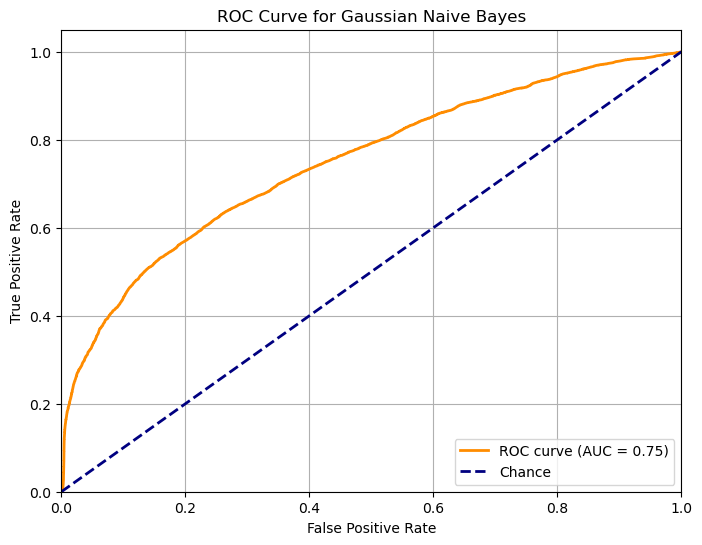

AUC = 0.75


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
y_test_probs = gnb_model.predict_proba(X_resampled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_resampled, y_test_probs)
roc_auc = roc_auc_score(y_resampled, y_test_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


print(f"AUC = {roc_auc:.2f}")

In [ ]:
#################################################################
#################################################################
#################################################################
#################################################################


df_test_masked_pp = pd.read_csv('Processing_FINAL.csv')
df_test_masked_pp = df_test_masked_pp.rename(columns={"transformed_income": "transformed_income_noutliers"})
X_test_masked = df_test_masked_pp[["transformed_income_noutliers","age","marital_status_Married","housing_type_Homeowner with mortgage/loan",
                     "housing_type_Rented","marital_status_Never married","no_charge","sex_Male",
                     "recent_move_b"]]
X_test_masked.head()

,transformed_income_noutliers,age,marital_status_Married,housing_type_Homeowner with mortgage/loan,housing_type_Rented,marital_status_Never married,no_charge,sex_Male,recent_move_b
0,10.271631,82,1,0,0,0,0,1,0
1,10.596660,40,0,0,1,1,0,1,1
2,12.220966,54,1,1,0,0,0,0,0
3,0.000000,64,1,0,0,0,0,0,0
4,10.596660,35,1,1,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler


columns_to_scale = ["transformed_income_noutliers", "age"]


X_test_scaled = X_test_masked.copy()


scaler = StandardScaler()
X_test_scaled[columns_to_scale] = scaler.fit_transform(X_test_masked[columns_to_scale])

print(X_test_scaled.head())

   transformed_income_noutliers       age  ...  sex_Male  recent_move_b
0                      0.477453  2.195960  ...         1              0
1                      0.564687 -0.306087  ...         1              1
2                      1.000631  0.527929  ...         0              0
3                     -2.279326  1.123654  ...         0              0
4                      0.564687 -0.603950  ...         1              0

[5 rows x 9 columns]


In [ ]:
y_test_masked_predictions =gnb_model.predict(X_test_scaled)


y_test_masked_predictions = np.where(y_test_masked_predictions == 1, 'TRUE', 'FALSE')


submission = pd.DataFrame({
   'custid': df_test_masked_pp['custid'],
    'health_ins': y_test_masked_predictions
})


submission.to_csv('submissiongnb.csv', index=False, header=True)

#########################################################################################################
#########################################################################################################

#3) **Conclusion**

  
The models were evaluated using **different preprocessing techniques**.  
- As a result, the performance metrics **cannot be directly compared** between the two groups of models.  
- Each group reflects results specific to its respective preprocessing pipeline.  
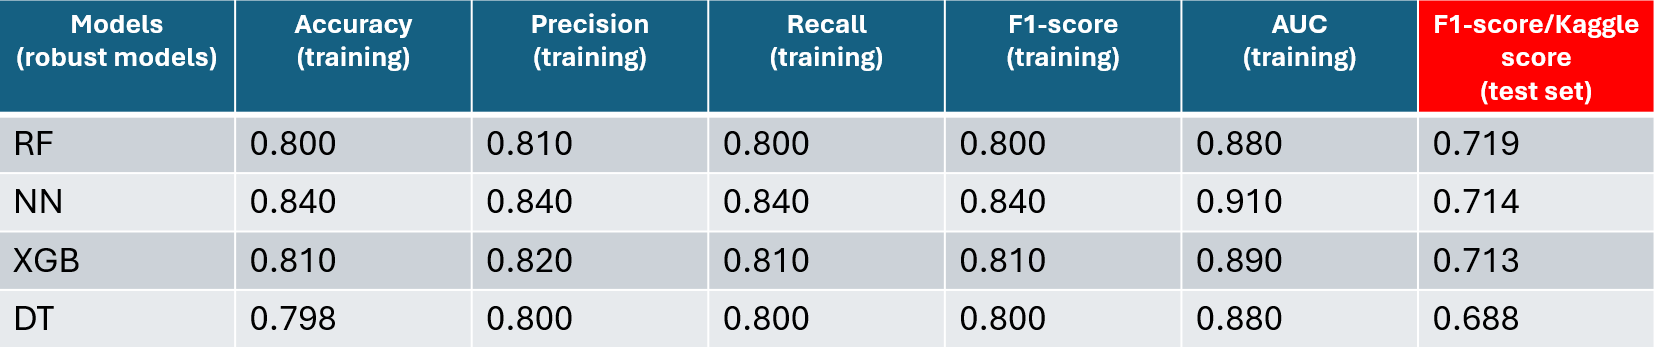
###Model Evaluation Summary for Robust Models:
- **Best Model**: Random Forest (RF) achieved the highest F1-score on the test set (**0.719**).  
- **Neural Network (NN)** had the highest AUC during training (**0.910**) but performed slightly worse on the test set (**0.714**).  
- **XGBoost (XGB)** showed stable performance but did not surpass RF.  
- **Decision Tree (DT)** had the weakest test F1-score (**0.688**), indicating lower generalization ability.  




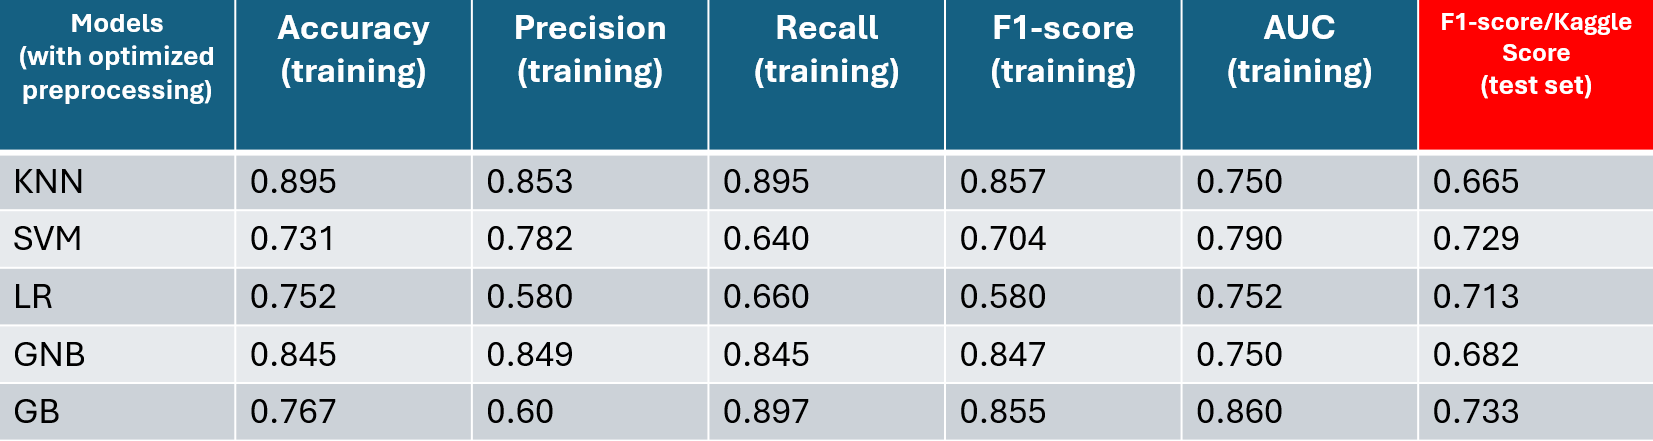
### Model Evaluation Summary for Models with Optimized Preprocessing

- **Best Model**: **Gradient Boosting (GB)**, with the highest **F1-score (0.733)** on the test set. It also showed a strong balance between **recall (0.897)** and **precision** during training, making it the most reliable model.
- **Second-Best**: **SVM** performed well on the test set with an **F1-score of 0.729**, slightly behind GB but still effective for identifying customers without health insurance.
- **KNN** demonstrated high **accuracy (0.895)** and **recall (0.895)** during training but showed a lower **F1-score (0.665)** on the test set, indicating weaker generalization ability.
- **Logistic Regression (LR)** had a relatively low **recall (0.660)** and **precision (0.580)** during training, which led to a lower **F1-score (0.580)** and reduced performance on the test set (**F1-score = 0.713**).
- **Gaussian Naive Bayes (GNB)** showed strong performance during training (**F1-score = 0.847**) but struggled with generalization, achieving a lower **F1-score = 0.682** on the test set.

### Key Takeaways:
- **Gradient Boosting (GB)** is the most reliable and balanced model for identifying uninsured customers and should be prioritized for business applications.
- **SVM** is a strong alternative, providing a solid balance between precision and recall, and performs well on the test set.
- **KNN** and **Logistic Regression** are less effective for this task due to poor generalization on unseen data.
- **GNB** performs well in training but does not generalize as well as GB or SVM.


### Lessons Learnt  
- **Preprocessing Matters**: Optimizing data preprocessing can significantly impact model performance and generalization.  
- **Model Evaluation**: Evaluating models on unseen data is essential to avoid overfitting and ensure reliability in real-world scenarios.  
- **Balancing Metrics**: Focusing on metrics like **F1-score** ensures a balance between precision and recall, which is crucial for business decisions(in this case(predicting if someone had health insurance) the F1-score was the most important metric.  
- **Iterative Testing**: Testing multiple models (e.g., RF, SVM, GB) helps identify the most suitable solution for the business goal.  

These insights guided us to identify the best solution for the business.

---

#**Recommendation for the Business/Companies**  
Among all the models we worked with in this project, as data scientists, we recommend that companies implement the Gradient Boosting (GB) model, trained on a dataset with optimized preprocessing.

#### **What Does This Mean for the Business/Company?**  
The **Gradient Boosting** model achieved the highest **F1-score (0.733)** on unseen data, indicating it is the most reliable at:  
- Correctly identifying customers **without health insurance**.  
- Minimizing errors, leading to a balanced and effective solution.  

#### In Practical Terms:  
- **Fewer False Positives**: Reduces the risk of targeting individuals who already have insurance, saving resources on marketing efforts.  
- **Fewer False Negatives**: Ensures fewer potential customers who lack health insurance are missed, maximizing opportunities to reach the right audience.  

#### Business Impact:  
By implementing the **Gradient Boosting model**, the company can:  
- **Optimize its marketing strategy** by focusing campaigns on the most promising leads—customers who genuinely do not have health insurance.  
- **Improve Cost Efficiency**: Avoid wasting marketing resources on incorrect leads.  
- **Achieve Higher ROI**: Increase the success rate of acquiring new clients.  
- **Promote Customer Growth**: Expand the company’s customer base by effectively reaching uninsured individuals who need health insurance.  

---

### **Final Recommendation**  
Implement the **Gradient Boosting model** with optimized preprocessing to prioritize **precision and recall** in identifying uninsured customers.  
This approach balances business goals—reducing wasted efforts while **increasing valuable customer acquisitions**.  
